In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import statsmodels.api as sm
import scipy.stats as stats
import numpy as np
import warnings
warnings.filterwarnings("ignore")

Determining diameter of asteroid


In [ ]:
data=pd.read_csv("/content/drive/MyDrive/Asteroid_Updated.csv")
data.head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
0,Ceres,2.769165,0.076009,10.594067,80.305532,73.597694,2.558684,2.979647,4.608202,8822.0,0,1002,3.34,N,N,939.4,964.4 x 964.2 x 891.8,0.0900,9.074170,62.6284,0.713,0.426,NaN,C,G,0.12,1.59478,MBA,0.213885,1683.145708,77.372096
1,Pallas,2.772466,0.230337,34.836234,173.080063,310.048857,2.133865,3.411067,4.616444,72318.0,0,8490,4.13,N,N,545,582x556x500,0.1010,7.813200,14.3000,0.635,0.284,NaN,B,B,0.11,1.23324,MBA,0.213503,1686.155999,59.699133
2,Juno,2.669150,0.256942,12.988919,169.852760,248.138626,1.983332,3.354967,4.360814,72684.0,0,7104,5.33,N,N,246.596,NaN,0.2140,7.210000,NaN,0.824,0.433,NaN,Sk,S,0.32,1.03454,MBA,0.226019,1592.787285,34.925016
3,Vesta,2.361418,0.088721,7.141771,103.810804,150.728541,2.151909,2.570926,3.628837,24288.0,0,9325,3.20,N,N,525.4,572.6 x 557.2 x 446.4,0.4228,5.342128,17.8000,0.782,0.492,NaN,V,V,0.32,1.13948,MBA,0.271609,1325.432765,95.861936
4,Astraea,2.574249,0.191095,5.366988,141.576605,358.687607,2.082324,3.066174,4.130323,63507.0,0,2916,6.85,N,N,106.699,NaN,0.2740,16.806000,NaN,0.826,0.411,NaN,S,S,NaN,1.09589,MBA,0.238632,1508.600458,282.366289


In [ ]:
print("Columns in dataset are ",list(data.columns))

Columns in dataset are  ['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent', 'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G', 'moid', 'class', 'n', 'per', 'ma']


In [ ]:
print("There are {} number of rows in dataset".format(data.shape[0]))
print("There are {} number of columns in dataset".format(data.shape[1]))

There are 839714 number of rows in dataset
There are 31 number of columns in dataset


In [ ]:
print("Number of data points where output(diameter) is null {}".format(data['diameter'].isnull().sum()))
print("Number of data points where output(diameter) is not null {}".format(data['diameter'].notnull().sum()))

Number of data points where output(diameter) is null 702078
Number of data points where output(diameter) is not null 137636


In [ ]:
data[data['diameter'].isnull()].head()

,name,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,diameter,extent,albedo,rot_per,GM,BV,UB,IR,spec_B,spec_T,G,moid,class,n,per,ma
681,Hagar,2.654040,0.171983,11.505647,190.799959,104.993824,2.197591,3.110489,4.323837,40313.0,0,2152,12.20,N,N,NaN,NaN,NaN,4.8503,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.215450,MBA,0.227952,1579.281370,134.457728
698,Hela,2.610998,0.410284,15.299180,242.551766,91.399514,1.539746,3.682249,4.219081,42540.0,0,2172,11.72,N,N,NaN,NaN,NaN,3.3962,NaN,0.854,0.386,NaN,Sq,S,NaN,0.624487,MCA,0.233612,1541.019467,237.586385
718,Albert,2.638780,0.546301,11.564845,183.887287,156.163668,1.197212,4.080348,4.286601,39478.0,0,1825,15.40,Y,N,NaN,NaN,NaN,5.8010,NaN,NaN,NaN,NaN,S,NaN,NaN,0.203359,AMO,0.229932,1565.680891,48.317252
729,Athanasia,2.243362,0.177505,4.234895,95.073806,123.549777,1.845154,2.641570,3.360139,39112.0,0,2183,13.80,N,N,NaN,NaN,NaN,5.7348,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.841461,MBA,0.293329,1227.290668,295.120065
842,Nicolaia,2.279598,0.209766,7.997715,4.071354,316.957209,1.801415,2.757780,3.441878,37651.0,0,1771,13.80,N,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.798230,MBA,0.286363,1257.146084,317.982712


In [ ]:
asteroid=data[data['diameter'].notnull()]

In [ ]:
print(asteroid.shape)

(137636, 31)


In [ ]:
Y=asteroid[['diameter']]
X=asteroid.drop(['diameter'],axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=42)

In [ ]:
print("Number of data points in training dataset are {}".format(X_train.shape[0]))
print("Number of data points in testing dataset are {}".format(X_test.shape[0]))

Number of data points in training dataset are 92216
Number of data points in testing dataset are 45420


In [ ]:
train=pd.concat([X_train,Y_train],axis=1)
test=pd.concat([X_test,Y_test],axis=1)

EDA

In [ ]:
X_train=X_train.drop('name',axis=1)
X_test=X_test.drop('name',axis=1)

In [ ]:
print("Total number of missing values in semi major axis in training dataset is {}".format(X_train['a'].isnull().sum()))
print("Total number of missing values in semi major axis in testing dataset is {}".format(X_test['a'].isnull().sum()))

Total number of missing values in semi major axis in training dataset is 0
Total number of missing values in semi major axis in testing dataset is 0


In [ ]:
print((X_train['a']))

54319     3.109871
155115    3.153208
79928     3.043164
282899    2.665060
410659    3.223407
            ...   
328306    2.548770
425920    2.683550
271354    3.154675
629518    2.627262
449890    3.194527
Name: a, Length: 92216, dtype: float64


In [ ]:
X_train['a']=X_train['a'].astype('float')
Y_train=Y_train.astype('float')
X_test['a']=X_test['a'].astype('float')
Y_test=Y_test.astype('float')

In [ ]:
print(X_train['a'])

54319     3.109871
155115    3.153208
79928     3.043164
282899    2.665060
410659    3.223407
            ...   
328306    2.548770
425920    2.683550
271354    3.154675
629518    2.627262
449890    3.194527
Name: a, Length: 92216, dtype: float64


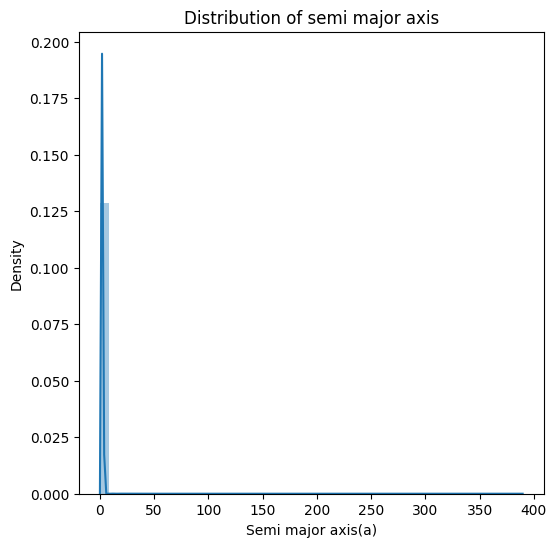

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['a'])
plt.xlabel("Semi major axis(a)")
plt.title("Distribution of semi major axis")
plt.show()


Text(0.5, 1.0, 'Boxplot of semi major axis')

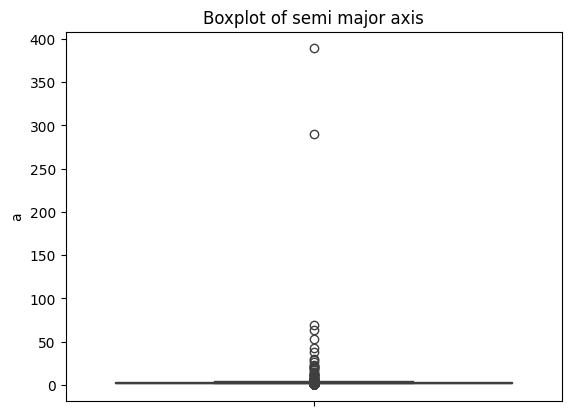

In [ ]:
sns.boxplot(data=X_train,y=X_train['a'])
plt.title("Boxplot of semi major axis")

In [ ]:
print("minimum value of semi major axis columns is {}".format(min(X_train['a'])))
print("50 percentile of semi major axis columns is {}".format(np.percentile(X_train['a'],50)))
print("95 percentile of semi major axis columns is {}".format(np.percentile(X_train['a'],95)))
print("99 percentile of semi major axis columns is {}".format(np.percentile(X_train['a'],99)))
print("maximum value of semi major axis columns is {}".format(max(X_train['a'])))

minimum value of semi major axis columns is 0.6262255386195801
50 percentile of semi major axis columns is 2.751649861876543
95 percentile of semi major axis columns is 3.218320584256743
99 percentile of semi major axis columns is 5.1819658420115955
maximum value of semi major axis columns is 389.1459641965956


Text(0.5, 1.0, 'Scatter plt between Diameter of asteroids and Semi major axis')

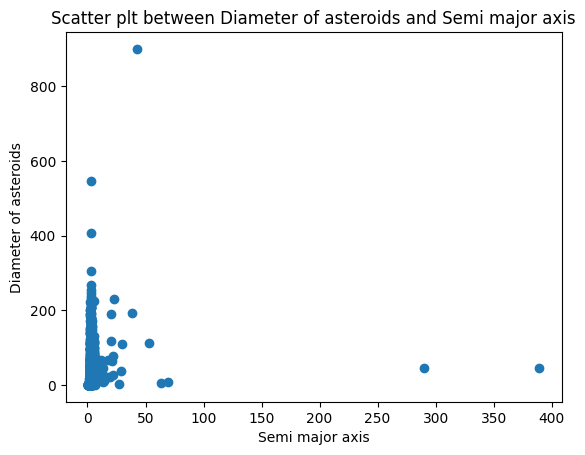

In [ ]:
plt.scatter(X_train['a'],Y_train)
plt.xlabel("Semi major axis")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plt between Diameter of asteroids and Semi major axis")

In [ ]:
from scipy.stats import spearmanr
coef, p = spearmanr(X_train['a'], Y_train)
print(coef)

0.5697192569459443


In [ ]:
print("Total number of missing values in eccentricity in training dataset is {}".format(X_train['e'].isnull().sum()))
print("Total number of missing values in eccentricity in testing dataset is {}".format(X_test['e'].isnull().sum()))

Total number of missing values in eccentricity in training dataset is 0
Total number of missing values in eccentricity in testing dataset is 0


In [ ]:
X_train['e']=X_train['e'].astype('float')
Y_train=Y_train.astype('float')
X_test['e']=X_test['e'].astype('float')
Y_test=Y_test.astype('float')

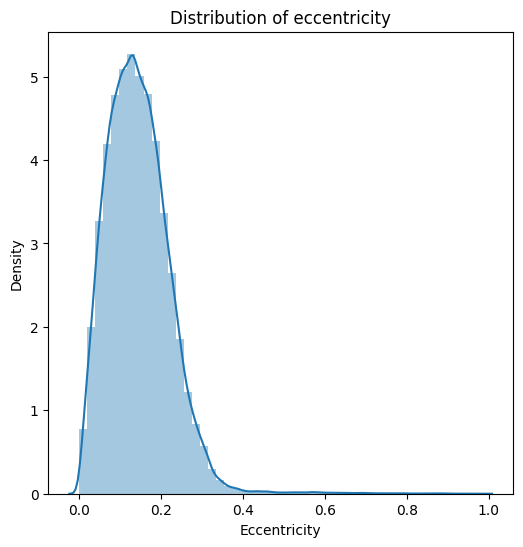

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['e'])
plt.xlabel("Eccentricity")
plt.title("Distribution of eccentricity")
plt.show()

In [ ]:
e_log=np.log(X_train['e'])

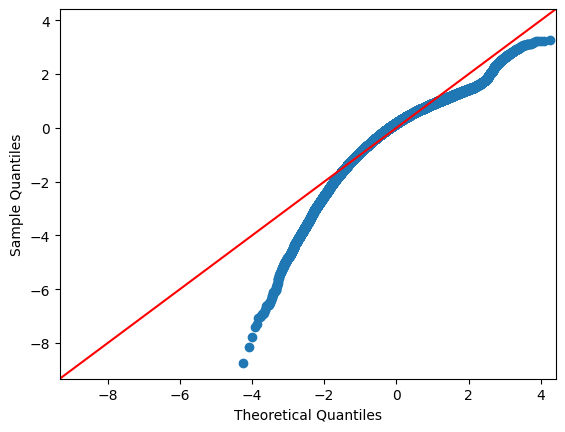

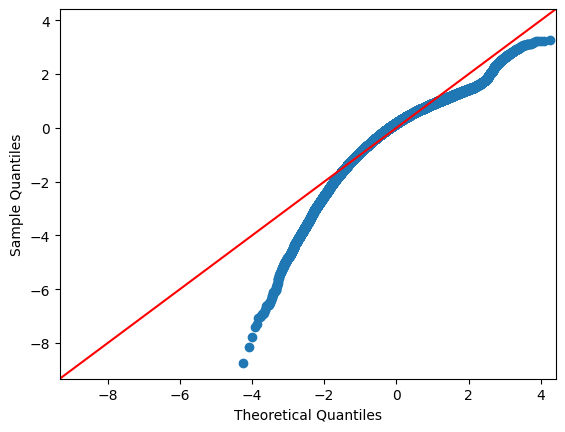

In [ ]:
sm.qqplot(e_log,line='45',fit=True,dist=stats.norm)

Text(0.5, 1.0, 'Boxplot of eccentricity')

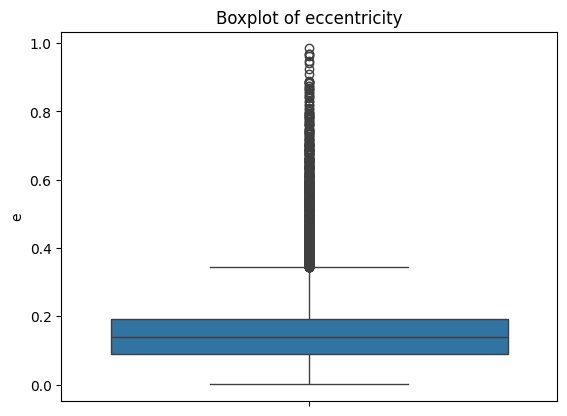

In [ ]:
sns.boxplot(data=X_train,y=X_train['e'])
plt.title("Boxplot of eccentricity")

In [ ]:
print("minimum value of eccentricity columns is {}".format(min(X_train['e'])))
print("50 percentile of eccentricity column is {}".format(np.percentile(X_train['e'],50)))
print("95 percentile of eccentricity column is {}".format(np.percentile(X_train['e'],95)))
print("99 percentile eccentricity column is {}".format(np.percentile(X_train['e'],99)))
print("maximum value of eccentricity column is {}".format(max(X_train['e'])))

minimum value of eccentricity columns is 0.0004885363213158
50 percentile of eccentricity column is 0.13840278796982045
95 percentile of eccentricity column is 0.27216810530081714
99 percentile eccentricity column is 0.3486587637810562
maximum value of eccentricity column is 0.9843481640691484


Text(0.5, 1.0, 'Scatter plot between eccentricity and diameter of asteroid')

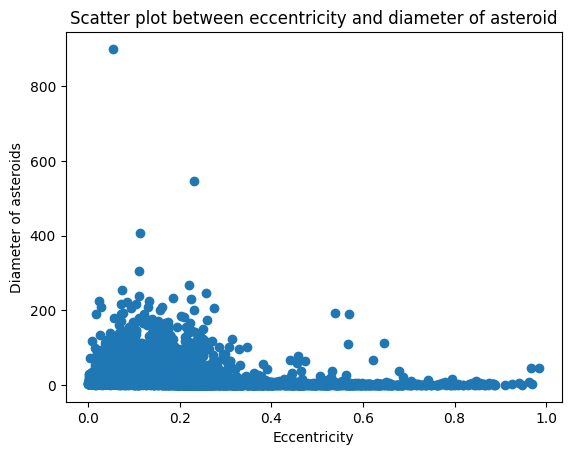

In [ ]:
plt.scatter(X_train['e'],Y_train)
plt.xlabel("Eccentricity")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between eccentricity and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['e'], Y_train)
print(coef)

-0.14830549457954262


In [ ]:
print("Total number of missing values in inclination with respect to x-y plane in training dataset is {}".format(X_train['i'].isnull().sum()))
print("Total number of missing values in inclination with respect to x-y plane in testing dataset is {}".format(X_test['i'].isnull().sum()))

Total number of missing values in inclination with respect to x-y plane in training dataset is 0
Total number of missing values in inclination with respect to x-y plane in testing dataset is 0


In [ ]:
X_train['i']=X_train['i'].astype('float')
Y_train=Y_train.astype('float')
X_test['i']=X_test['i'].astype('float')
Y_test=Y_test.astype('float')

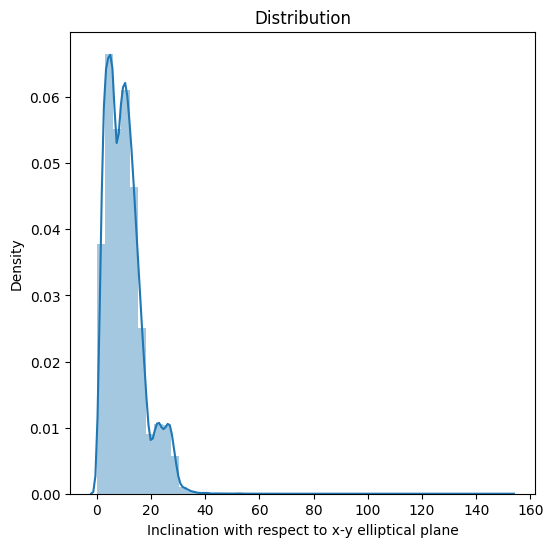

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['i'])
plt.xlabel("Inclination with respect to x-y elliptical plane")
plt.title("Distribution")
plt.show()

Text(0.5, 1.0, 'CDF of inclination with respect to x-y elliptical plane ')

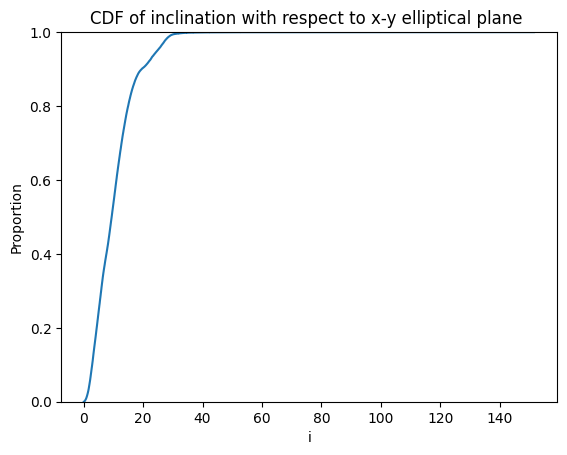

In [ ]:
sns.ecdfplot(data=X_train,x=X_train['i'])
plt.title("CDF of inclination with respect to x-y elliptical plane ")

In [ ]:
print("minimum value of inclination is {}".format(min(X_train['i'])))
print("50 percentile of inclination is {}".format(np.percentile(X_train['i'], 50)))
print("95 percentile of inclination is {}".format(np.percentile(X_train['i'], 90)))
print("99 percentile of inclination is {}".format(np.percentile(X_train['i'], 99)))
print("maximum value of inclination is {}".format(max(X_train['i'])))

minimum value of inclination is 0.04473841929128046
50 percentile of inclination is 9.416263027719989
95 percentile of inclination is 19.51737334049748
99 percentile of inclination is 29.03826756353518
maximum value of inclination is 151.8131359927367


Text(0.5, 1.0, 'Scatter plot between Inclination and diameter of asteroid')

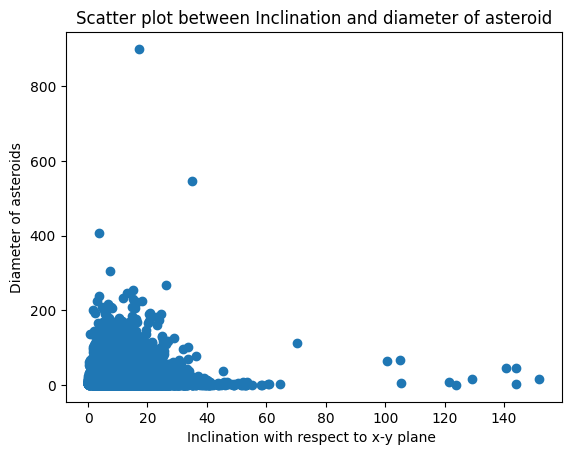

In [ ]:
plt.scatter(X_train['i'],Y_train)
plt.xlabel("Inclination with respect to x-y plane ")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between Inclination and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['i'], Y_train)
print(coef)

0.1334083818583983


In [ ]:
print("Number of missing values in om column in training dataset is {}".format(X_train['om'].isnull().sum()))
print("Number of missing values in om column in testing dataset is {}".format(X_test['om'].isnull().sum()))

Number of missing values in om column in training dataset is 0
Number of missing values in om column in testing dataset is 0


In [ ]:
X_train['om']=X_train['om'].astype('float')
Y_train=Y_train.astype('float')
X_test['om']=X_test['om'].astype('float')
Y_test=Y_test.astype('float')

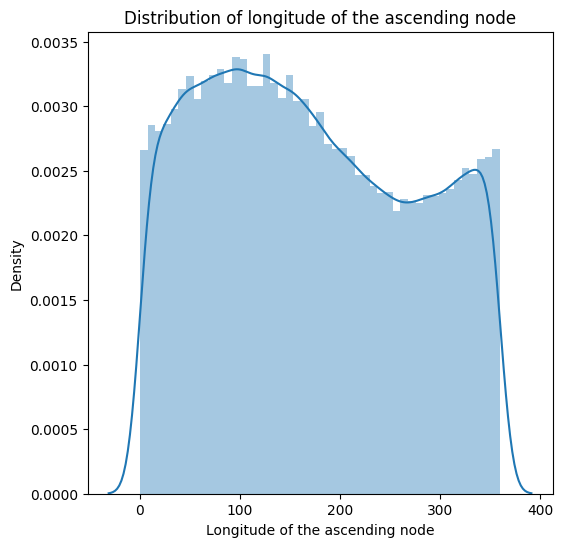

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['om'])
plt.xlabel("Longitude of the ascending node")
plt.title("Distribution of longitude of the ascending node")
plt.show()

In [ ]:
print("minimum value of longitude of the ascending node is {}".format(min(X_train['om'])))
print("50 percentile of longitude of the ascending node is {}".format(np.percentile(X_train['om'], 50)))
print("95 percentile of longitude of the ascending node is {}".format(np.percentile(X_train['om'], 90)))
print("99 percentile of longitude of the ascending node is {}".format(np.percentile(X_train['om'], 99)))
print("maximum value of longitude of the ascending node is {}".format(max(X_train['om'])))

minimum value of longitude of the ascending node is 0.0007381194225785
50 percentile of longitude of the ascending node is 160.2974561785569
95 percentile of longitude of the ascending node is 321.0978346282518
99 percentile of longitude of the ascending node is 356.4530513929204
maximum value of longitude of the ascending node is 359.9908583489855


Text(0.5, 1.0, 'Scatter plot between ascending node and diameter of asteroid')

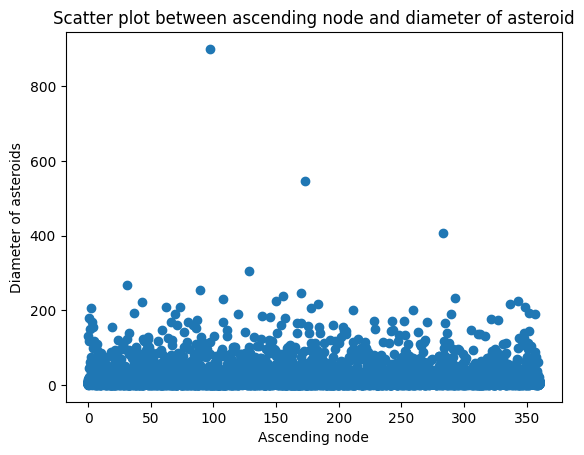

In [ ]:
plt.scatter(X_train['om'],Y_train)
plt.xlabel("Ascending node")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between ascending node and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['om'], Y_train)
print(coef)

0.002181142320756181


In [ ]:
print("Number of missing values in argument of perihelion column in training dataset is {}".format(X_train['w'].isnull().sum()))
print("Number of missing values in argument of perihelion column in testing dataset is {}".format(X_test['w'].isnull().sum()))

Number of missing values in argument of perihelion column in training dataset is 0
Number of missing values in argument of perihelion column in testing dataset is 0


In [ ]:
X_train['w']=X_train['w'].astype('float')
Y_train=Y_train.astype('float')
X_test['w']=X_test['w'].astype('float')
Y_test=Y_test.astype('float')

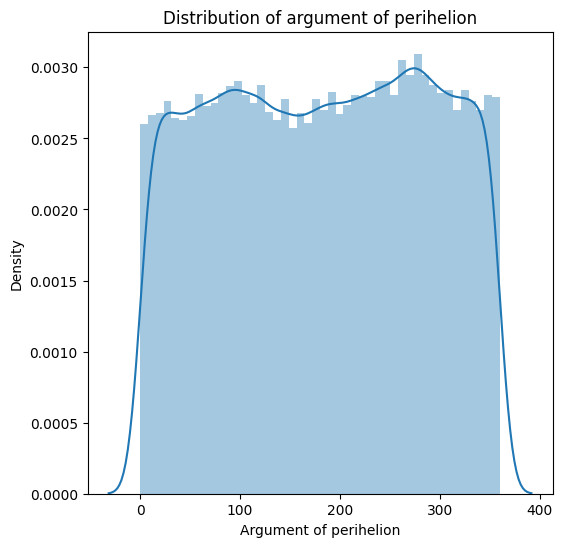

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['w'])
plt.xlabel("Argument of perihelion")
plt.title("Distribution of argument of perihelion")
plt.show()

In [ ]:
print("minimum value of argument of perihelion is {}".format(min(X_train['w'])))
print("50 percentile of argument of perihelion is {}".format(np.percentile(X_train['w'], 50)))
print("95 percentile of argument of perihelion is {}".format(np.percentile(X_train['w'], 90)))
print("99 percentile of argument of perihelion is {}".format(np.percentile(X_train['w'], 99)))
print("maximum value of argument of perihelion is {}".format(max(X_train['w'])))


minimum value of argument of perihelion is 0.01022452820345908
50 percentile of argument of perihelion is 183.5720701406945
95 percentile of argument of perihelion is 324.0460906617637
99 percentile of argument of perihelion is 356.2274759933288
maximum value of argument of perihelion is 359.9888857434956


Text(0.5, 1.0, 'Scatter plot between argument of perihelion and diameter of asteroid')

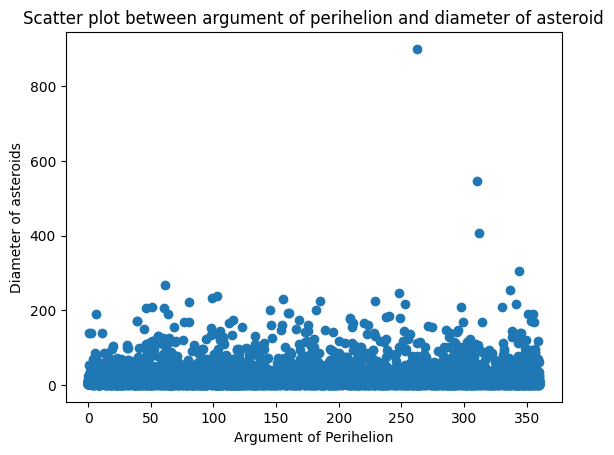

In [ ]:
plt.scatter(X_train['w'],Y_train)
plt.xlabel("Argument of Perihelion")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between argument of perihelion and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['w'], Y_train)
print(coef)

0.0032513948115996


In [ ]:
print("No of missing points in perihelion distance column in training dataset is {}".format(X_train['q'].isnull().sum()))
print("No of missing points in perihelion distance column in testing dataset is {}".format(X_test['q'].isnull().sum()))

No of missing points in perihelion distance column in training dataset is 0
No of missing points in perihelion distance column in testing dataset is 0


In [ ]:
X_train['q']=X_train['q'].astype('float')
Y_train=Y_train.astype('float')
X_test['q']=X_test['q'].astype('float')
Y_test=Y_test.astype('float')

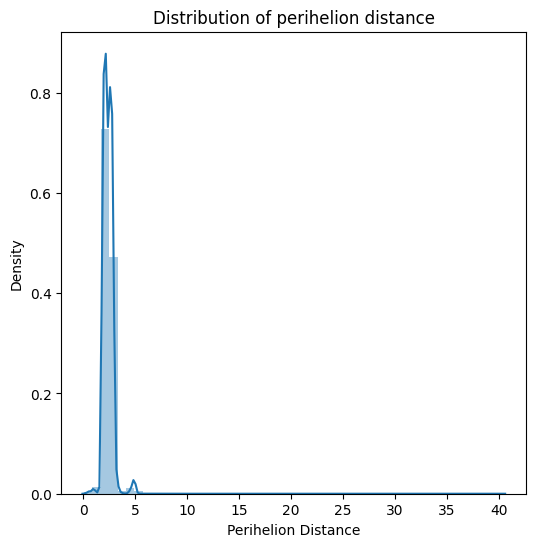

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['q'])
plt.xlabel("Perihelion Distance")
plt.title("Distribution of perihelion distance")
plt.show()


In [ ]:
print("Minimum value of perihelion distance is {}".format(min(X_train['q'])))
print("50 percentile of perihelion distance is {}".format(np.percentile(X_train['q'], 50)))
print("95 percentile of perihelion distance is {}".format(np.percentile(X_train['q'], 90)))
print("99 percentile of perihelion distance is {}".format(np.percentile(X_train['q'], 99)))
print("Maximum value of perihelion distance is {}".format(max(X_train['q'])))

Minimum value of perihelion distance is 0.08188215046210022
50 percentile of perihelion distance is 2.3641586026490495
95 percentile of perihelion distance is 2.88427269447035
99 percentile of perihelion distance is 4.735963816761822
Maximum value of perihelion distance is 40.46567138768128


Text(0.5, 1.0, 'Scatter plot between perihelion distance and diameter of asteroid')

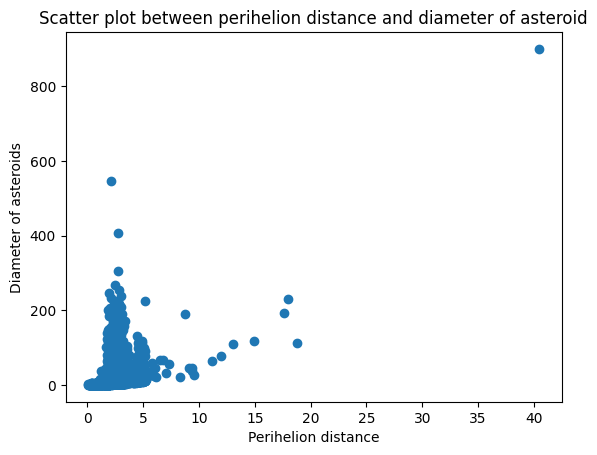

In [ ]:
plt.scatter(X_train['q'],Y_train)
plt.xlabel("Perihelion distance")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between perihelion distance and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['q'], Y_train)
print(coef)

0.523488964662777


In [ ]:
print("Number of missing values in aphelion distance column in training dataset is {}".format(X_train['ad'].isnull().sum()))
print("Number of missing values in aphelion distance column in testing dataset is {}".format(X_test['ad'].isnull().sum()))

Number of missing values in aphelion distance column in training dataset is 0
Number of missing values in aphelion distance column in testing dataset is 0


In [ ]:
X_train['ad']=X_train['ad'].astype('float')
Y_train=Y_train.astype('float')
X_test['ad']=X_test['ad'].astype('float')
Y_test=Y_test.astype('float')

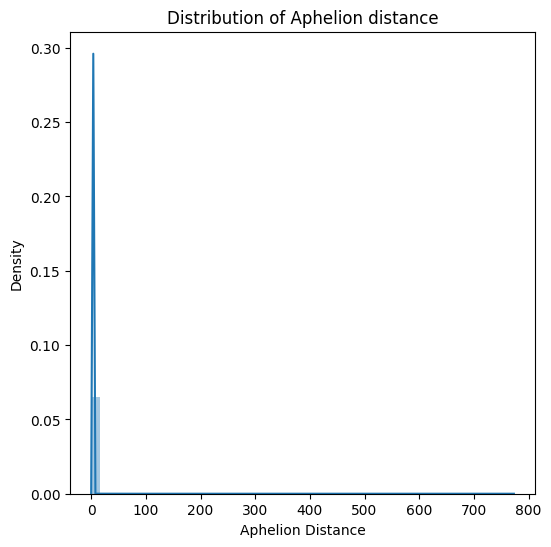

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['ad'])
plt.xlabel("Aphelion Distance")
plt.title("Distribution of Aphelion distance")
plt.show()

Text(0.5, 1.0, 'Box plot of aphelion distance')

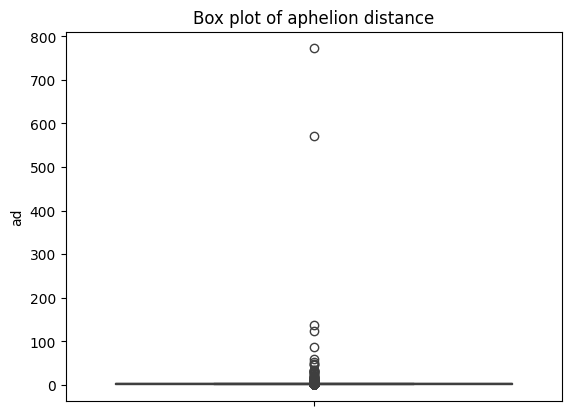

In [ ]:
sns.boxplot(data=X_train,y=X_train['ad'])
plt.title("Box plot of aphelion distance")

In [ ]:
print("Min value of aphelion distance is {}".format(min(X_train['ad'])))
print("50 percentile of aphelion distance is {}".format(np.percentile(X_train['ad'], 50)))
print("95 percentile of aphelion distance is {}".format(np.percentile(X_train['ad'], 90)))
print("99 percentile of aphelion distance is {}".format(np.percentile(X_train['ad'], 99)))
print("Max value of aphelion distance is {}".format(max(X_train['ad'])))

Min value of aphelion distance is 0.9999559149519088
50 percentile of aphelion distance is 3.167737163060644
95 percentile of aphelion distance is 3.734283055823061
99 percentile of aphelion distance is 5.486717977274724
Max value of aphelion distance is 772.2010796084331


Text(0.5, 1.0, 'Scatter plot between aphelion distance and diameter of asteroid')

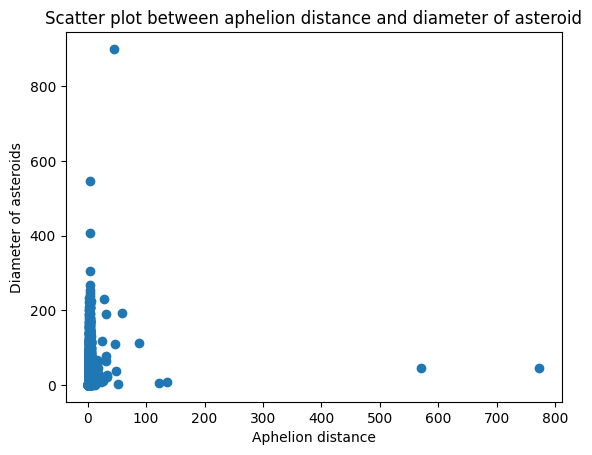

In [ ]:
plt.scatter(X_train['ad'],Y_train)
plt.xlabel("Aphelion distance")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between aphelion distance and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['ad'], Y_train)
print(coef)

0.48286343179497343


In [ ]:
print("Number of missing values in orbital period column in training dataset is {}".format(X_train['per_y'].isnull().sum()))
print("Number of missing values in orbital period column in testing dataset is {}".format(X_test['per_y'].isnull().sum()))

Number of missing values in orbital period column in training dataset is 0
Number of missing values in orbital period column in testing dataset is 0


In [ ]:
X_train['per_y']=X_train['per_y'].astype('float')
Y_train=Y_train.astype('float')
X_test['per_y']=X_test['per_y'].astype('float')
Y_test=Y_test.astype('float')

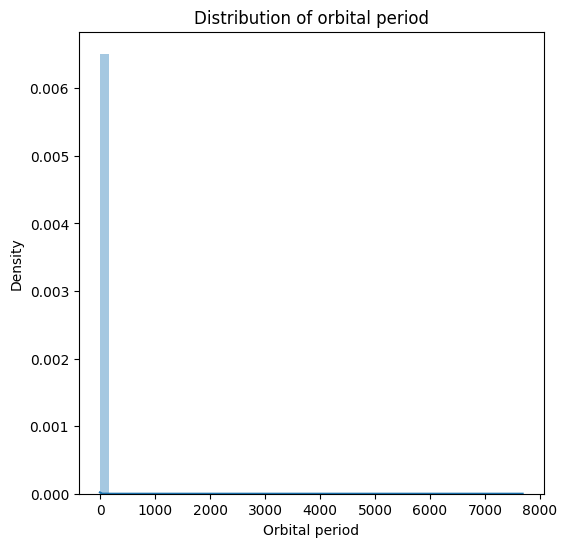

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['per_y'])
plt.xlabel("Orbital period")
plt.title("Distribution of orbital period")
plt.show()

In [ ]:
print("Min value of Orbital period is {}".format(min(X_train['per_y'])))
print("50 percentile of Orbital period is {}".format(np.percentile(X_train['per_y'], 50)))
print("95 percentile of Orbital period is {}".format(np.percentile(X_train['per_y'], 90)))
print("99 percentile of Orbital period is {}".format(np.percentile(X_train['per_y'], 99)))
print("Max value of Orbital period is {}".format(max(X_train['per_y'])))

Min value of Orbital period is 0.495569266063932
50 percentile of Orbital period is 4.564549888971575
95 percentile of Orbital period is 5.66647423771826
99 percentile of Orbital period is 11.796414414923584
Max value of Orbital period is 7676.74294290649


Text(0.5, 1.0, 'Scatter plot between orbital period and diameter of asteroid')

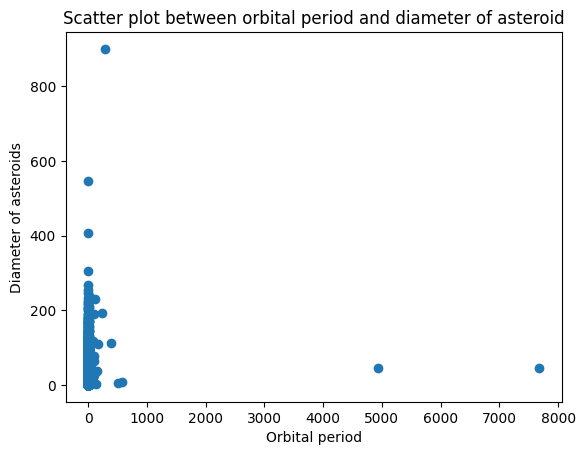

In [ ]:
plt.scatter(X_train['per_y'],Y_train)
plt.xlabel("Orbital period")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between orbital period and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['per_y'], Y_train)
print(coef)

0.5697192569459443


In [ ]:
print("Number of missing value in data arc span column in training dataset is {}".format(X_train['data_arc'].isnull().sum()))
print("Number of missing value in data arc span column in testing dataset is {}".format(X_test['data_arc'].isnull().sum()))

Number of missing value in data arc span column in training dataset is 94
Number of missing value in data arc span column in testing dataset is 44


In [ ]:
X_train['data_arc']=X_train['data_arc'].fillna(X_train['data_arc'].median())

In [ ]:
X_test['data_arc']=X_test['data_arc'].fillna(X_train['data_arc'].median())

In [ ]:
X_train['data_arc']=X_train['data_arc'].astype('float')
Y_train=Y_train.astype('float')
X_test['data_arc']=X_test['data_arc'].astype('float')
Y_test=Y_test.astype('float')

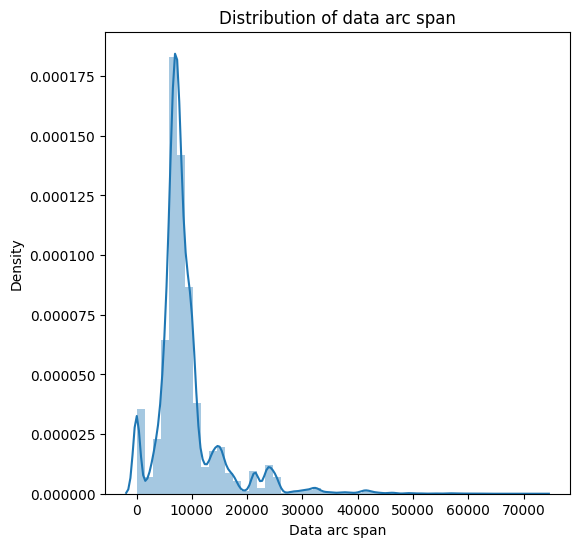

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['data_arc'])
plt.xlabel("Data arc span")
plt.title("Distribution of data arc span")
plt.show()

In [ ]:
print("Min value of data arc span is {}".format(min(X_train['data_arc'])))
print("50 percentile of data arc span is {}".format(np.percentile(X_train['data_arc'], 50)))
print("95 percentile of data arc span is {}".format(np.percentile(X_train['data_arc'], 90)))
print("99 percentile of data arc span is {}".format(np.percentile(X_train['data_arc'], 99)))
print("Max value of data arc span is {}".format(max(X_train['data_arc'])))

Min value of data arc span is 1.0
50 percentile of data arc span is 7569.0
95 percentile of data arc span is 15202.0
99 percentile of data arc span is 33313.850000000006
Max value of data arc span is 72684.0


Text(0.5, 1.0, 'Scatter plot between data arc span and diameter of asteroid')

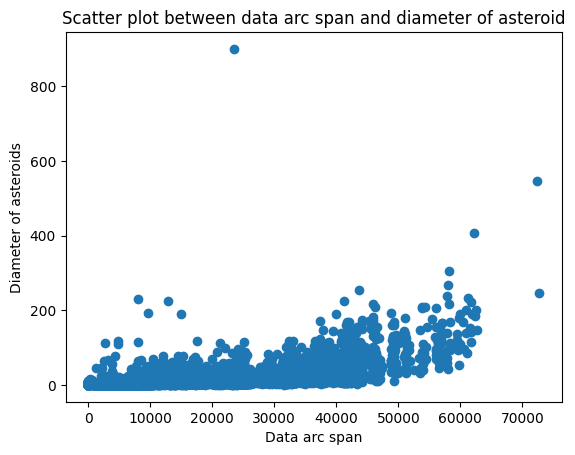

In [ ]:
plt.scatter(X_train['data_arc'],Y_train)
plt.xlabel("Data arc span")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between data arc span and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['data_arc'], Y_train)
print(coef)

0.3760998192654934


In [ ]:
print("Number of missing value in condition code in training dataset are {}".format(X_train['condition_code'].isnull().sum()))
print("Number of missing value in condition code in testing dataset are {}".format(X_test['condition_code'].isnull().sum()))

Number of missing value in condition code in training dataset are 0
Number of missing value in condition code in testing dataset are 0


In [ ]:
X_train['condition_code']=X_train['condition_code'].astype('int')

In [ ]:
temp=list(X_train.groupby('condition_code').size())
temp_df={'condition_code':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['condition_code'].append(str(index))
  temp_df['count'].append(value)
temp_df=pd.DataFrame(temp_df)

<Axes: xlabel='condition_code', ylabel='count'>

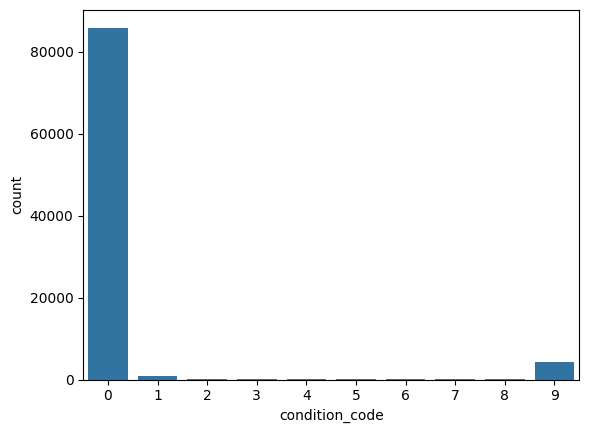

In [ ]:
sns.barplot(x="condition_code", y="count", data=temp_df)

In [ ]:
temp_hist=pd.concat([X_train,Y_train],axis=1)

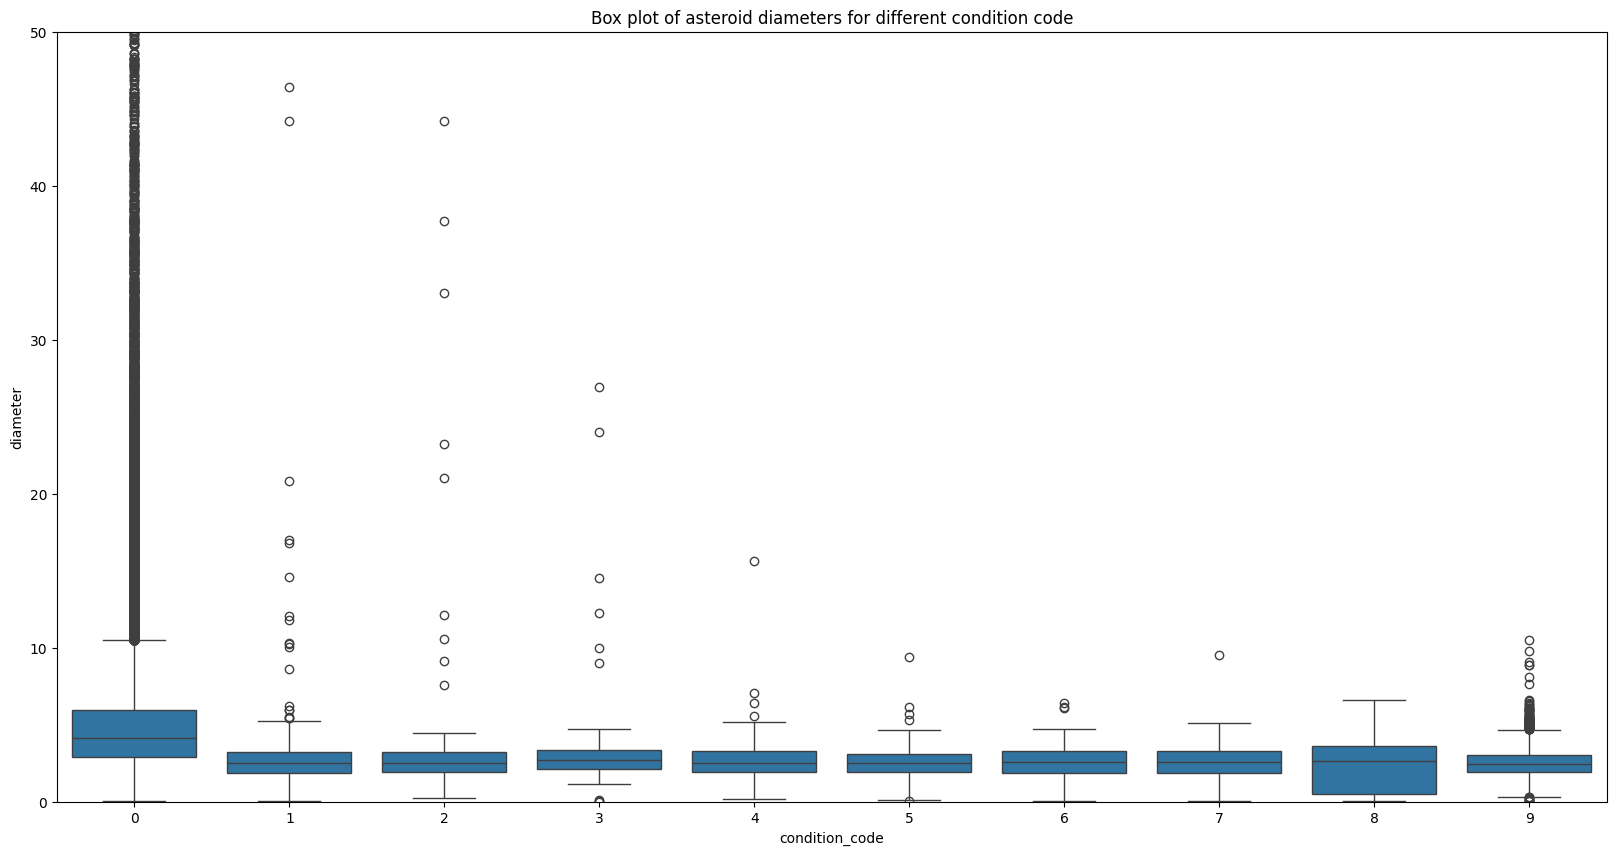

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot(data=temp_hist,x='condition_code',y='diameter')
plt.ylim((0,50))
plt.title("Box plot of asteroid diameters for different condition code")
plt.show()

In [ ]:
print("Number of missing values is number of observation used column in training dataset {}".format(X_train['n_obs_used'].isnull().sum()))
print("Number of missing values is number of observation used column in testing dataset {}".format(X_test['n_obs_used'].isnull().sum()))

Number of missing values is number of observation used column in training dataset 0
Number of missing values is number of observation used column in testing dataset 0


In [ ]:
X_train['n_obs_used']=X_train['n_obs_used'].astype('int')
Y_train=Y_train.astype('float')
X_test['n_obs_used']=X_test['n_obs_used'].astype('int')
Y_test=Y_test.astype('float')

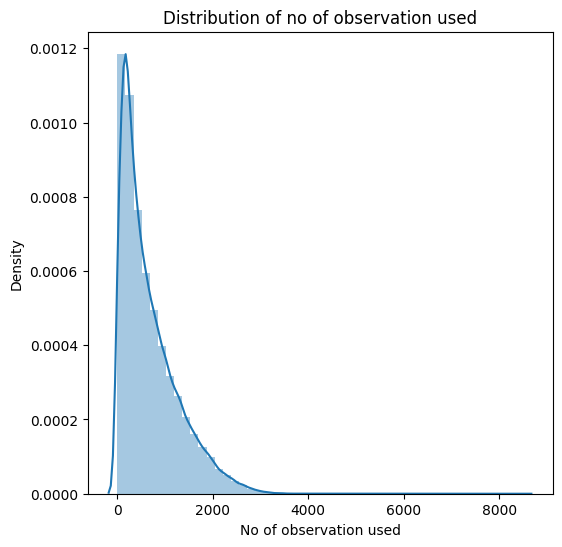

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['n_obs_used'])
plt.xlabel("No of observation used")
plt.title("Distribution of no of observation used")
plt.show()

In [ ]:
print("50 percentile of no of obs used is {}".format(np.percentile(X_train['n_obs_used'], 50)))
print("95 percentile of no of obs used is {}".format(np.percentile(X_train['n_obs_used'], 90)))
print("99 percentile of no of obs used is {}".format(np.percentile(X_train['n_obs_used'], 99)))
print("Max value of no of obs used is {}".format(max(X_train['n_obs_used'])))

50 percentile of no of obs used is 494.0
95 percentile of no of obs used is 1534.0
99 percentile of no of obs used is 2525.0
Max value of no of obs used is 8490


Text(0.5, 1.0, 'Scatter plot between number of observation used and diameter of asteroid')

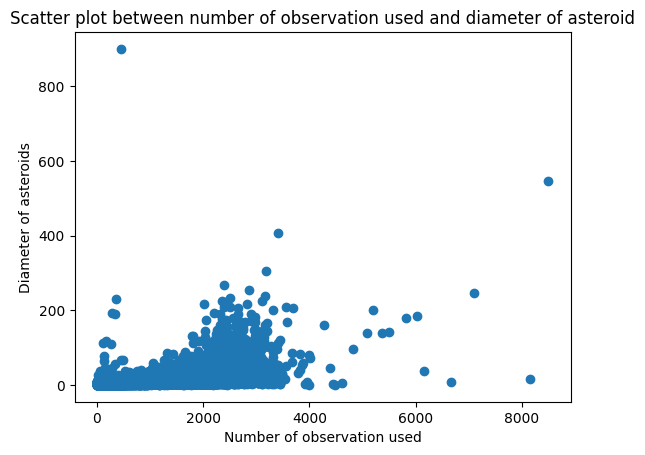

In [ ]:
plt.scatter(X_train['n_obs_used'],Y_train)
plt.xlabel("Number of observation used")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between number of observation used and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['n_obs_used'], Y_train)
print(coef)

0.43058756446451335


In [ ]:
print("Number of missing value in absolute magnitude parameter column in training dataset is {}".format(X_train['H'].isnull().sum()))
print("Number of missing value in absolute magnitude parameter column in testing dataset is {}".format(X_test['H'].isnull().sum()))

Number of missing value in absolute magnitude parameter column in training dataset is 509
Number of missing value in absolute magnitude parameter column in testing dataset is 238


In [ ]:
temp=temp_hist[temp_hist['H'].notnull()]
X_temp=temp[['diameter']]
Y_temp=temp[['H']]
X_train_temp,X_test_temp,Y_train_temp,Y_test_temp=train_test_split(X_temp,Y_temp,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_accuracy=[]
test_accuracy=[]
k_n=[1,3,5,10,15,25]
for i in k_n :
  neigh=KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train_temp,Y_train_temp)
  Y_train_pred=neigh.predict(X_train_temp)
  train_accuracy.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=neigh.predict(X_test_temp)
  test_accuracy.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum test error in knn model is {}".format(min(test_accuracy)))

Minimum test error in knn model is 0.6046479086069858


In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train_temp,Y_train_temp)
Y_train_pred=lr.predict(X_train_temp)
train_error_linear=mean_squared_error(Y_train_temp,Y_train_pred)
Y_test_pred=lr.predict(X_test_temp)
test_error_linear=mean_squared_error(Y_test_temp,Y_test_pred)

In [ ]:
print("Minimum test error in linear regression model is {}".format(test_error_linear))

Minimum test error in linear regression model is 1.4968277415403994


In [ ]:
from sklearn.ensemble import RandomForestRegressor
#There are many hyperparameter in random forest i will play with
train_accuracy_rf=[]
test_accuracy_rf=[]
k=[10,20,40,60,100]
for i in k :
  rf=RandomForestRegressor(n_estimators=i)
  rf.fit(X_train_temp,Y_train_temp)
  Y_train_pred=rf.predict(X_train_temp)
  train_accuracy_rf.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=rf.predict(X_test_temp)
  test_accuracy_rf.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum test error in random forest model is {}".format(min(test_accuracy_rf)))

Minimum test error in random forest model is 0.6665166067896791


In [ ]:
train_temp=pd.concat([X_train,Y_train],axis=1)

In [ ]:
np.argmin(test_accuracy)

5

In [ ]:
import math
best_k=k_n[np.argmin(test_accuracy)]
best_neigh=KNeighborsRegressor(n_neighbors=best_k)
best_neigh.fit(X_train_temp,Y_train_temp)
for index,value in train_temp.iterrows() :
  if math.isnan(value['H'])==True :
    train_temp.at[index,'H']=best_neigh.predict(np.array(value['diameter']).reshape(1,-1))[0][0]

In [ ]:
test_temp=pd.concat([X_test,Y_test],axis=1)

In [ ]:
best_k=k_n[np.argmin(test_accuracy)]
best_neigh=KNeighborsRegressor(n_neighbors=best_k)
best_neigh.fit(X_train_temp,Y_train_temp)
count=0
for index,value in test_temp.iterrows() :
  if math.isnan(value['H'])==True :
    test_temp.at[index,'H']=best_neigh.predict(np.array(value['diameter']).reshape(1,-1))[0][0]

In [ ]:

Y_train=train_temp[['diameter']]
X_train=train_temp.drop('diameter',axis=1)
Y_test=test_temp[['diameter']]
X_test=test_temp.drop('diameter',axis=1)

In [ ]:
print("Number of missing values in training dataset in absolute magnitude parameter column is {}".format(X_train['H'].isnull().sum()))
print("Number of missing values in testing dataset in absolute magnitude parameter column is {}".format(X_test['H'].isnull().sum()))

Number of missing values in training dataset in absolute magnitude parameter column is 0
Number of missing values in testing dataset in absolute magnitude parameter column is 0


In [ ]:
print("Min value of absolute magnitude parameter is {}".format(min(X_train['H'])))
print("50 percentile of absolute magnitude parameter is {}".format(np.percentile(X_train['H'], 50)))
print("95 percentile of absolute magnitude parameter is {}".format(np.percentile(X_train['H'], 90)))
print("99 percentile of absolute magnitude parameter is {}".format(np.percentile(X_train['H'], 99)))
print("Max value of absolute magnitude parameter is {}".format(max(X_train['H'])))

Min value of absolute magnitude parameter is 3.6
50 percentile of absolute magnitude parameter is 15.3
95 percentile of absolute magnitude parameter is 16.8
99 percentile of absolute magnitude parameter is 18.0
Max value of absolute magnitude parameter is 29.9


In [ ]:
print("Number of missing values in training dataset in neo column is {}".format(X_train['neo'].isnull().sum()))
print("Number of missing values in testing dataset in neo column is {}".format(X_test['neo'].isnull().sum()))

Number of missing values in training dataset in neo column is 0
Number of missing values in testing dataset in neo column is 0


In [ ]:
temp=list(X_train.groupby('neo').size())
temp_df={'neo':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['count'].append(value)
temp_df['neo'].extend(['N','Y'])
temp_df=pd.DataFrame(temp_df)
temp_df.columns=['neo','count']

<Axes: xlabel='neo', ylabel='count'>

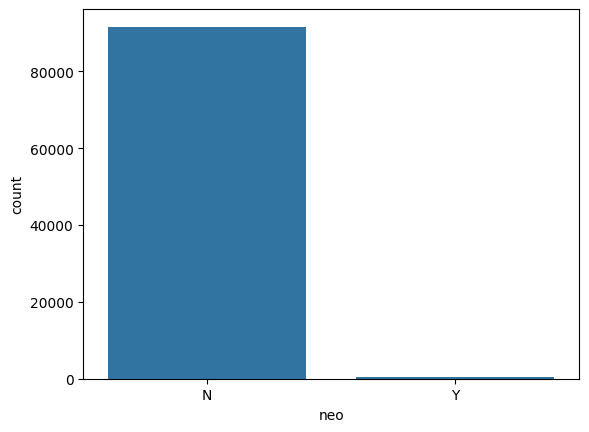

In [ ]:
sns.barplot(x="neo", y="count", data=temp_df)

In [ ]:
print("Percentage of Near earth objects are {}".format((563)/(563+91653)))

Percentage of Near earth objects are 0.006105231196321679


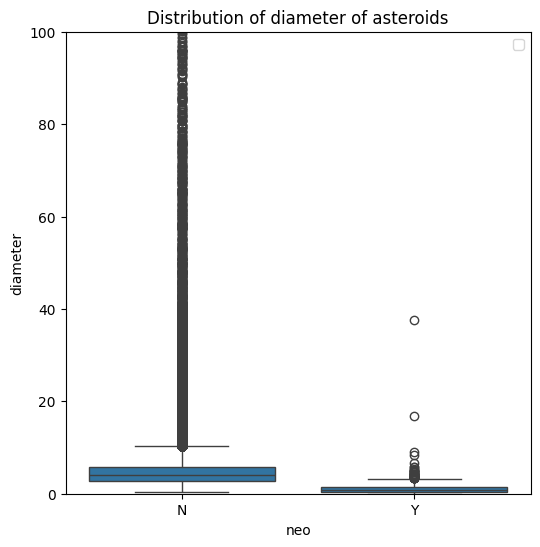

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=temp_hist,x='neo',y='diameter')
plt.title("Distribution of diameter of asteroids")
plt.ylim(0,100)
plt.legend()
plt.show()

In [ ]:
print("Number of missing value in training dataset of pha column is {}".format(X_train['pha'].isnull().sum()))
print("Number of missing values in testing dataset of pha column is {}".format(X_test['pha'].isnull().sum()))

Number of missing value in training dataset of pha column is 0
Number of missing values in testing dataset of pha column is 0


In [ ]:
temp=list(X_train.groupby('pha').size())
temp_df={'pha':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['count'].append(value)
temp_df['pha'].extend(['N','Y'])
temp_df=pd.DataFrame(temp_df)
temp_df.columns=['pha','count']

<Axes: xlabel='pha', ylabel='count'>

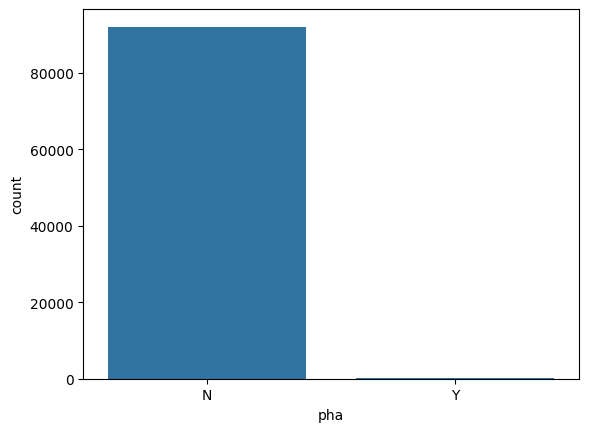

In [ ]:
sns.barplot(x="pha", y="count", data=temp_df)

In [ ]:
print("Percentage of Physically hazardous objects are {}".format((141)/(141+92075)))

Percentage of Physically hazardous objects are 0.0015290188253665308


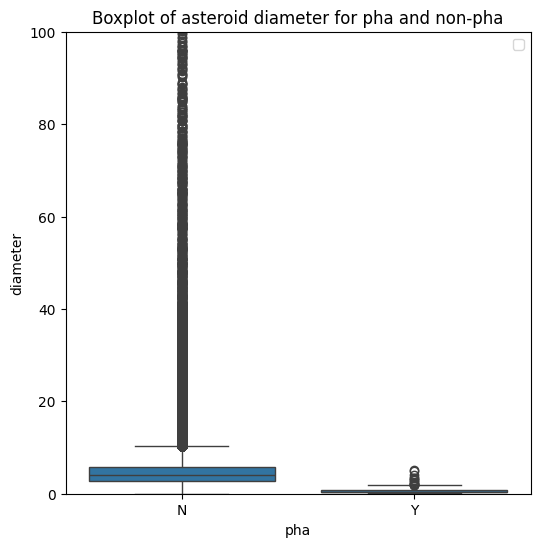

In [ ]:
plt.figure(figsize=(6,6))
sns.boxplot(data=temp_hist,x='pha',y='diameter')
plt.title("Boxplot of asteroid diameter for pha and non-pha")
plt.ylim((0,100))
plt.legend()
plt.show()

In [ ]:
print("Number of missing values in extent column in training dataset {}".format(X_train['extent'].isnull().sum()))
print("Number of missing values in extent column in testing dataset {}".format(X_test['extent'].isnull().sum()))

Number of missing values in extent column in training dataset 92206
Number of missing values in extent column in testing dataset 45414


In [ ]:
print("Percentage of missing values in extent column in training dataset {}".format((X_train['extent'].isnull().sum())/(X_train.shape[0])))
print("Percentage of missing values in extent column in testing dataset {}".format((X_test['extent'].isnull().sum())/(X_test.shape[0])))

Percentage of missing values in extent column in training dataset 0.9998915589485555
Percentage of missing values in extent column in testing dataset 0.9998678996036988


In [ ]:
X_train=X_train.drop('extent',axis=1)
X_test=X_test.drop('extent',axis=1)

In [ ]:
print("Number of missing values in albedo column in training dataset is {}".format(X_train['albedo'].isnull().sum()))
print("Number of missing values in albedo column in testing dataset is {}".format(X_test['albedo'].isnull().sum()))

Number of missing values in albedo column in training dataset is 842
Number of missing values in albedo column in testing dataset is 388


In [ ]:
temp=temp_hist[temp_hist['albedo'].notnull()]
#WE used oonly diameter in our prevois model let's just use diameter + H this time
X_temp=temp[['diameter']]
Y_temp=temp[['albedo']]
X_train_temp,X_test_temp,Y_train_temp,Y_test_temp=train_test_split(X_temp,Y_temp,test_size=0.3)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
train_error_knn=[]
test_error_knn=[]
k=[1,3,5,10,15,25]
for i in k :
  neigh=KNeighborsRegressor(n_neighbors=i)
  neigh.fit(X_train_temp,Y_train_temp)
  Y_train_pred=neigh.predict(X_train_temp)
  train_error_knn.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=neigh.predict(X_test_temp)
  test_error_knn.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum error in knn model is {}".format(min(test_error_knn)))

Minimum error in knn model is 0.011337453996386533


In [ ]:
train_error_rf=[]
test_error_rf=[]
k=[1,10,20,50,100]
for i in k :
  rf=RandomForestRegressor(n_estimators=i,random_state=42)
  rf.fit(X_train_temp,Y_train_temp)
  Y_train_pred=rf.predict(X_train_temp)
  train_error_rf.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=rf.predict(X_test_temp)
  test_error_rf.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum error in random forest model is {}".format(min(test_error_rf)))

Minimum error in random forest model is 0.012442784355829397


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
train_error_gb=[]
test_error_gb=[]
k=[1,10,20,50,100]
for i in k :
  gb=GradientBoostingRegressor(n_estimators=i,random_state=42)
  gb.fit(X_train_temp,Y_train_temp)
  Y_train_pred=gb.predict(X_train_temp)
  train_error_gb.append(mean_squared_error(Y_train_temp,Y_train_pred))
  Y_test_pred=gb.predict(X_test_temp)
  test_error_gb.append(mean_squared_error(Y_test_temp,Y_test_pred))

In [ ]:
print("Minimum error in gbdt model is {}".format(min(test_error_gb)))

Minimum error in gbdt model is 0.010914168089154422


In [ ]:
train_temp=pd.concat([X_train,Y_train],axis=1)

In [ ]:
import math
best_k=k[np.argmin(test_error_gb)]
best_gb=GradientBoostingRegressor(n_estimators=best_k)
best_gb.fit(X_train_temp,Y_train_temp)
for index,value in train_temp.iterrows() :
  if math.isnan(value['albedo'])==True :
    train_temp.at[index,'albedo']=best_gb.predict(np.array(value['diameter']).reshape(1,-1))[0]

In [ ]:
test_temp=pd.concat([X_test,Y_test],axis=1)

In [ ]:
best_k=k[np.argmin(test_error_gb)]
best_gb=GradientBoostingRegressor(n_estimators=best_k)
best_gb.fit(X_train_temp,Y_train_temp)
for index,value in test_temp.iterrows() :
  if math.isnan(value['albedo'])==True :
    test_temp.at[index,'albedo']=best_gb.predict(np.array(value['diameter']).reshape(1,-1))[0]

In [ ]:
Y_train=train_temp[['diameter']]
X_train=train_temp.drop('diameter',axis=1)
Y_test=test_temp[['diameter']]
X_test=test_temp.drop('diameter',axis=1)

In [ ]:
print("Number of missing values in albedo column in training dataset is {}".format(X_train['albedo'].isnull().sum()))
print("Number of missing values in albedo column in testing dataset is {}".format(X_test['albedo'].isnull().sum()))

Number of missing values in albedo column in training dataset is 0
Number of missing values in albedo column in testing dataset is 0


In [ ]:
X_train['albedo']=X_train['albedo'].astype('float')
Y_train=Y_train.astype('float')

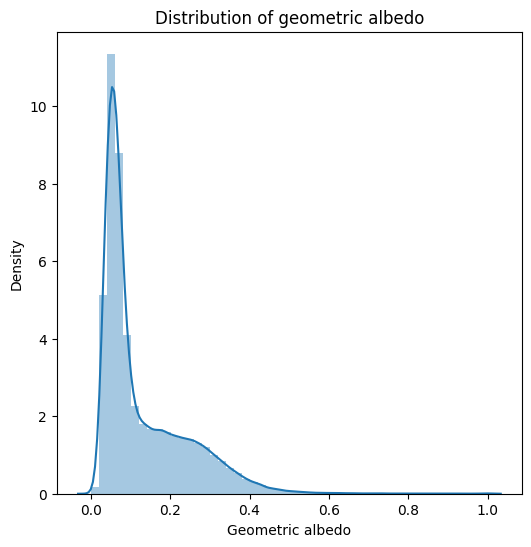

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['albedo'])
plt.xlabel("Geometric albedo")
plt.title("Distribution of geometric albedo")
plt.show()

In [ ]:
print("Min value of Geometric albedo is {}".format(min(X_train['albedo'])))
print("50 percentile of Geometric albedo is {}".format(np.percentile(X_train['albedo'], 50)))
print("95 percentile of Geometric albedo is {}".format(np.percentile(X_train['albedo'], 90)))
print("99 percentile of Geometric albedo is {}".format(np.percentile(X_train['albedo'], 99)))
print("Max value of Geometric albedo is {}".format(max(X_train['albedo'])))

Min value of Geometric albedo is 0.001
50 percentile of Geometric albedo is 0.079
95 percentile of Geometric albedo is 0.294
99 percentile of Geometric albedo is 0.464
Max value of Geometric albedo is 1.0


Text(0.5, 1.0, 'Scatter plot between albedo and diameter of asteroid')

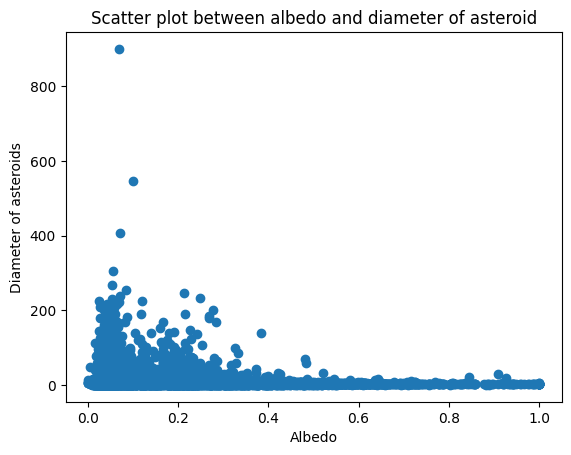

In [ ]:
plt.scatter(X_train['albedo'],Y_train)
plt.xlabel("Albedo")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between albedo and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['albedo'], Y_train)
print(coef)

-0.2732198912621842


In [ ]:
print("Number of missing values in moid column in training dataset is {}".format(X_train['moid'].isnull().sum()))
print("Number of missing values in moid column in testing dataset is {}".format(X_test['moid'].isnull().sum()))

Number of missing values in moid column in training dataset is 0
Number of missing values in moid column in testing dataset is 0


In [ ]:
X_train['moid']=X_train['moid'].astype('float')
Y_train=Y_train.astype('float')
X_test['moid']=X_test['moid'].astype('float')
Y_test=Y_test.astype('float')

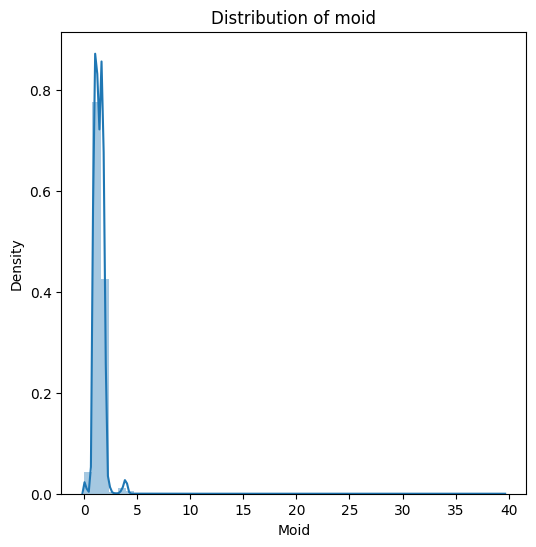

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['moid'])
plt.xlabel("Moid")
plt.title("Distribution of moid")
plt.show()

In [ ]:
print("Min value of moid is {}".format(min(X_train['moid'])))
print("50 percentile of moid is {}".format(np.percentile(X_train['moid'], 50)))
print("95 percentile of moid is {}".format(np.percentile(X_train['moid'], 90)))
print("99 percentile of moid is {}".format(np.percentile(X_train['moid'], 99)))
print("Max value of moid is {}".format(max(X_train['moid'])))

Min value of moid is 0.000307103
50 percentile of moid is 1.385305
95 percentile of moid is 1.90173
99 percentile of moid is 3.756564500000001
Max value of moid is 39.507


Text(0.5, 1.0, 'Scatter plot between moid and diameter of asteroid')

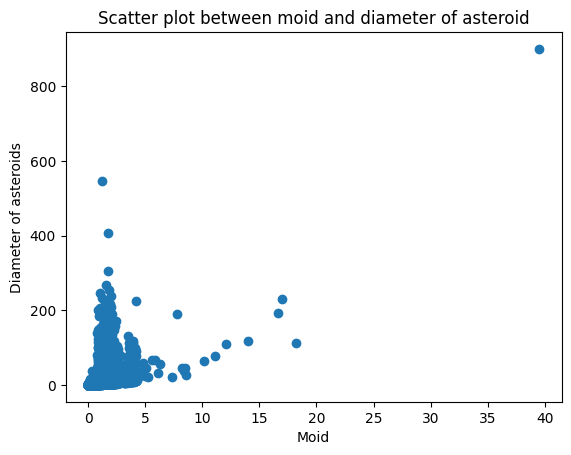

In [ ]:
plt.scatter(X_train['moid'],Y_train)
plt.xlabel("Moid")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between moid and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['moid'], Y_train)
print(coef)

0.5280713230250377


In [ ]:
print("Number of missing values in rotation period column in training dataset is {}".format(X_train['rot_per'].isnull().sum()))
print("Number of missing values in rotation period column in testing dataset is {}".format(X_test['rot_per'].isnull().sum()))

Number of missing values in rotation period column in training dataset is 84790
Number of missing values in rotation period column in testing dataset is 41658


In [ ]:
print("Fraction of missing values in rotation period column in training dataset is {}".format((X_train['rot_per'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in rotation period column in testing dataset is {}".format((X_test['rot_per'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in rotation period column in training dataset is 0.9194716751973627
Fraction of missing values in rotation period column in testing dataset is 0.4517437321072265


In [ ]:
X_train=X_train.drop('rot_per',axis=1)
X_test=X_test.drop('rot_per',axis=1)

In [ ]:
print("Number of missing values in GM column in training dataset is {}".format(X_train['GM'].isnull().sum()))
print("Number of missing values in GM column in testing dataset is {}".format(X_test['GM'].isnull().sum()))

Number of missing values in GM column in training dataset is 92207
Number of missing values in GM column in testing dataset is 45415


In [ ]:
print("Fraction of missing values in GM column in training dataset is {}".format((X_train['GM'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in GM column in testing dataset is {}".format((X_test['GM'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in GM column in training dataset is 0.9999024030537
Fraction of missing values in GM column in testing dataset is 0.49248503513490066


In [ ]:
X_train=X_train.drop('GM',axis=1)
X_test=X_test.drop('GM',axis=1)

In [ ]:
print("Number of missing values in BV column in training dataset is {}".format(X_train['BV'].isnull().sum()))
print("Number of missing values in BV column in testing dataset is {}".format(X_test['BV'].isnull().sum()))

Number of missing values in BV column in training dataset is 91551
Number of missing values in BV column in testing dataset is 45080


In [ ]:
print("Fraction of missing values in BV column in training dataset is {}".format((X_train['BV'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in BV column in testing dataset is {}".format((X_test['BV'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in BV column in training dataset is 0.9927886700789451
Fraction of missing values in BV column in testing dataset is 0.4888522599115121


In [ ]:
X_train=X_train.drop('BV',axis=1)
X_test=X_test.drop('BV',axis=1)

In [ ]:
print("Number of missing values in UB column in training dataset is {}".format(X_train['UB'].isnull().sum()))
print("Number of missing values in UB column in testing dataset is {}".format(X_test['UB'].isnull().sum()))

Number of missing values in UB column in training dataset is 91578
Number of missing values in UB column in testing dataset is 45093


In [ ]:
print("Fraction of missing values in UB column in training dataset is {}".format((X_train['UB'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in UB column in testing dataset is {}".format((X_test['UB'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in UB column in training dataset is 0.9930814609178451
Fraction of missing values in UB column in testing dataset is 0.4889932332783899


In [ ]:
X_train=X_train.drop('UB',axis=1)
X_test=X_test.drop('UB',axis=1)

In [ ]:
print("Number of missing values in IR column in training dataset is {}".format(X_train['IR'].isnull().sum()))
print("Number of missing values in IR column in testing dataset is {}".format(X_test['IR'].isnull().sum()))

Number of missing values in IR column in training dataset is 92216
Number of missing values in IR column in testing dataset is 45419


In [ ]:
print("Fraction of missing values in IR column in training dataset is {}".format((X_train['IR'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in IR column in testing dataset is {}".format((X_test['IR'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in IR column in training dataset is 1.0
Fraction of missing values in IR column in testing dataset is 0.49252841155547844


In [ ]:
X_train=X_train.drop('IR',axis=1)
X_test=X_test.drop('IR',axis=1)

In [ ]:
print("Number of missing values in spec_B in training dataset {}".format(X_train['spec_B'].isnull().sum()))
print("Number of missing values in spec_B in testing dataset {}".format(X_test['spec_B'].isnull().sum()))

Number of missing values in spec_B in training dataset 91323
Number of missing values in spec_B in testing dataset 44943


In [ ]:
print("Fraction of missing values in spec_B column in training dataset is {}".format((X_train['spec_B'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in spec_B column in testing dataset is {}".format((X_test['spec_B'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in spec_B column in training dataset is 0.990316214106012
Fraction of missing values in spec_B column in testing dataset is 0.48736661750672333


In [ ]:
X_train=X_train.drop('spec_B',axis=1)
X_test=X_test.drop('spec_B',axis=1)

In [ ]:
print("Number of missing values in spec_T in training dataset {}".format(X_train['spec_T'].isnull().sum()))
print("Number of missing values in spec_T in testing dataset {}".format(X_test['spec_T'].isnull().sum()))

Number of missing values in spec_T in training dataset 91572
Number of missing values in spec_T in testing dataset 45099


In [ ]:
print("Fraction of missing values in spec_T column in training dataset is {}".format((X_train['spec_T'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in spec_T column in testing dataset is {}".format((X_test['spec_T'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in spec_T column in training dataset is 0.9930163962869784
Fraction of missing values in spec_T column in testing dataset is 0.48905829790925653


In [ ]:
X_train=X_train.drop('spec_T',axis=1)
X_test=X_test.drop('spec_T',axis=1)

In [ ]:
print("Number of missing values in G in training dataset {}".format(X_train['G'].isnull().sum()))
print("Number of missing values in G in testing dataset {}".format(X_test['G'].isnull().sum()))

Number of missing values in G in training dataset 92136
Number of missing values in G in testing dataset 45381


In [ ]:
print("Fraction of missing values in G column in training dataset is {}".format((X_train['G'].isnull().sum())/(X_train.shape[0])))
print("Fraction of missing values in G column in testing dataset is {}".format((X_test['G'].isnull().sum())/(X_train.shape[0])))

Fraction of missing values in G column in training dataset is 0.9991324715884445
Fraction of missing values in G column in testing dataset is 0.49211633555998957


In [ ]:
X_train=X_train.drop('G',axis=1)
X_test=X_test.drop('G',axis=1)

In [ ]:
print("Number of missing values in n column in training dataset is {}".format(X_train['n'].isnull().sum()))
print("Number of missing values in n column in testing dataset is {}".format(X_test['n'].isnull().sum()))

Number of missing values in n column in training dataset is 0
Number of missing values in n column in testing dataset is 0


In [ ]:
X_train['n']=X_train['n'].astype('float')
Y_train=Y_train.astype('float')
X_test['n']=X_test['n'].astype('float')
Y_test=Y_test.astype('float')

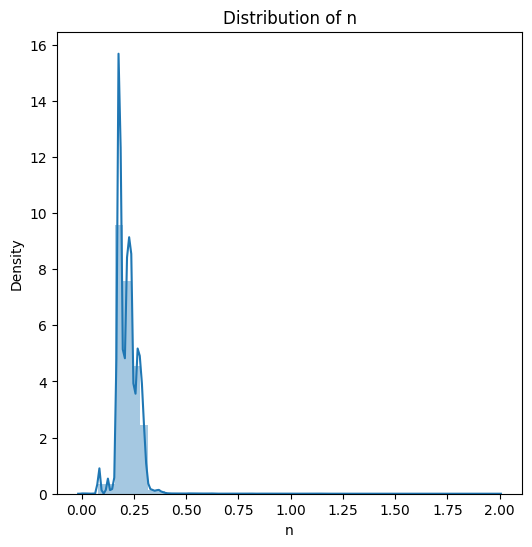

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['n'])
plt.xlabel("n")
plt.title("Distribution of n")
plt.show()

Text(0.5, 1.0, 'CDF plot of n')

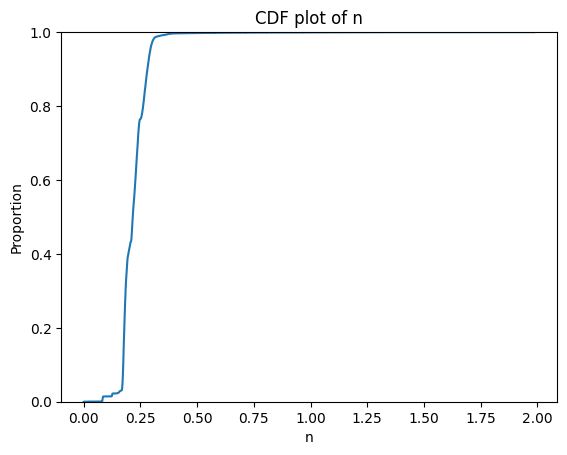

In [ ]:
sns.ecdfplot(data=X_train,x=X_train['n'])
plt.title('CDF plot of n')

In [ ]:
print("minimum value of n column is {}".format(min(X_train['n'])))
print("50 percentile of n column is {}".format(np.percentile(X_train['n'], 50)))
print("95 percentile of n column is {}".format(np.percentile(X_train['n'], 90)))
print("99 percentile of n column is {}".format(np.percentile(X_train['n'], 99)))
print("maximum value of n column is {}".format(max(X_train['n'])))

minimum value of n column is 0.00012839120584053
50 percentile of n column is 0.21593066290123558
95 percentile of n column is 0.28068578210866546
99 percentile of n column is 0.3353771941883027
maximum value of n column is 1.988876935803367


Text(0.5, 1.0, 'Scatter plot between n and diameter of asteroid')

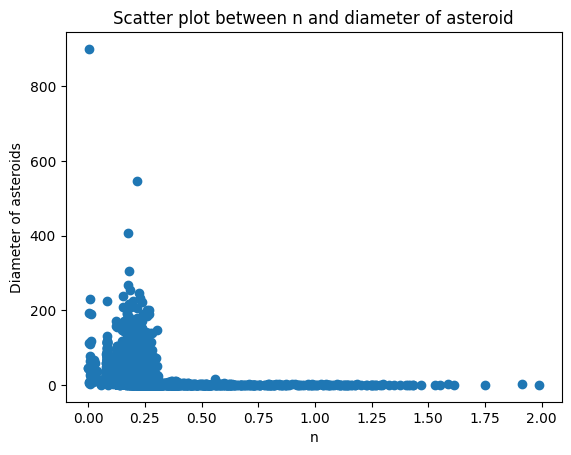

In [ ]:
#Checking relationship between n and diameter
plt.scatter(X_train['n'],Y_train)
plt.xlabel("n")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between n and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['n'], Y_train)
print(coef)

-0.5697192569459443


In [ ]:
print("Number of missing values in per column in training dataset is {}".format(X_train['per'].isnull().sum()))
print("Number of missing values in per column in testing dataset is {}".format(X_test['per'].isnull().sum()))

Number of missing values in per column in training dataset is 0
Number of missing values in per column in testing dataset is 0


In [ ]:
X_train['per']=X_train['per'].astype('float')
Y_train=Y_train.astype('float')
X_test['per']=X_test['per'].astype('float')
Y_test=Y_test.astype('float')

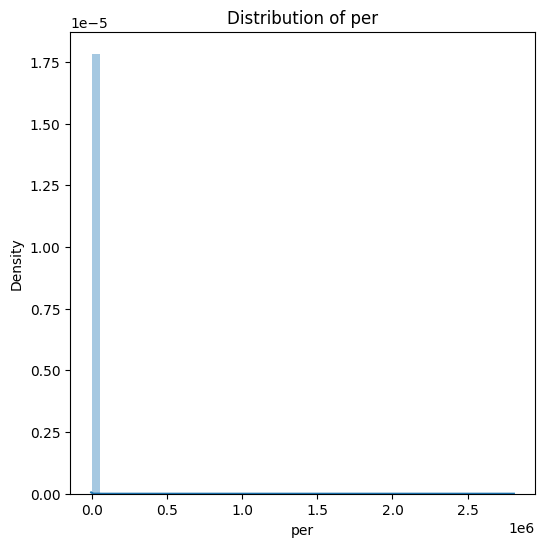

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['per'])
plt.xlabel("per")
plt.title("Distribution of per")
plt.show()

Text(0.5, 1.0, 'Box plot of per')

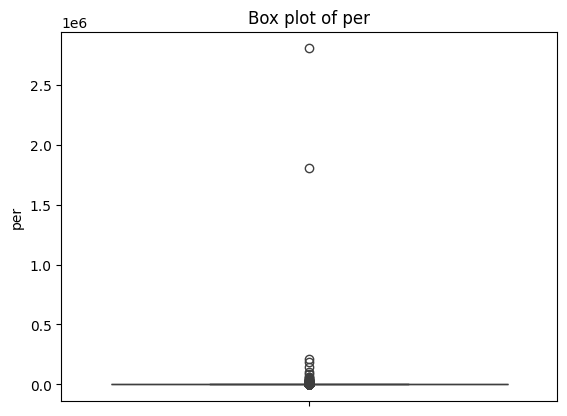

In [ ]:
sns.boxplot(data=X_train,y=X_train['per'])
plt.title('Box plot of per')

In [ ]:
print("minimum value of per is {}".format(min(X_train['per'])))
print("50 percentile of per is {}".format(np.percentile(X_train['per'], 50)))
print("95 percentile of per is {}".format(np.percentile(X_train['per'], 90)))
print("99 percentile of per is {}".format(np.percentile(X_train['per'], 99)))
print("maximum value of per is {}".format(max(X_train['per'])))

minimum value of per is 181.0066744298511
50 percentile of per is 1667.201846946868
95 percentile of per is 2069.6797153265943
99 percentile of per is 4308.64036505085
maximum value of per is 2803930.359896594


Text(0.5, 1.0, 'Scatter plot between per and diameter of asteroid')

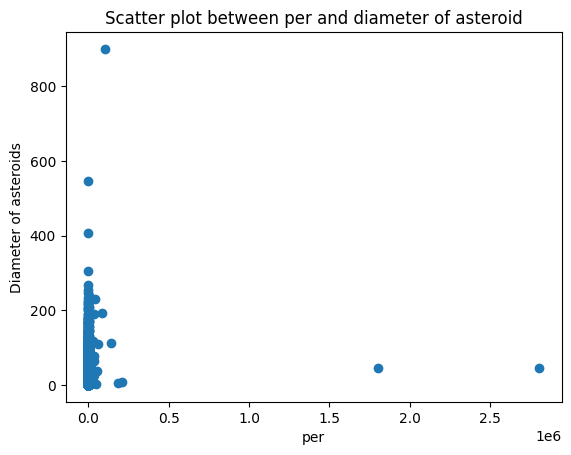

In [ ]:
#Checking relationship between per and diameter
plt.scatter(X_train['per'],Y_train)
plt.xlabel("per")
plt.ylabel("Diameter of asteroids")
plt.title("Scatter plot between per and diameter of asteroid")

In [ ]:
coef, p = spearmanr(X_train['per'], Y_train)
print(coef)

0.5697192569459443


In [ ]:

print("Number of missing values in ma column in training dataset is {}".format(X_train['ma'].isnull().sum()))
print("Number of missing values in ma column in testing dataset is {}".format(X_test['ma'].isnull().sum()))

Number of missing values in ma column in training dataset is 0
Number of missing values in ma column in testing dataset is 0


In [ ]:
X_train['ma']=X_train['ma'].astype('float')
Y_train=Y_train.astype('float')
X_test['ma']=X_test['ma'].astype('float')
Y_test=Y_test.astype('float')

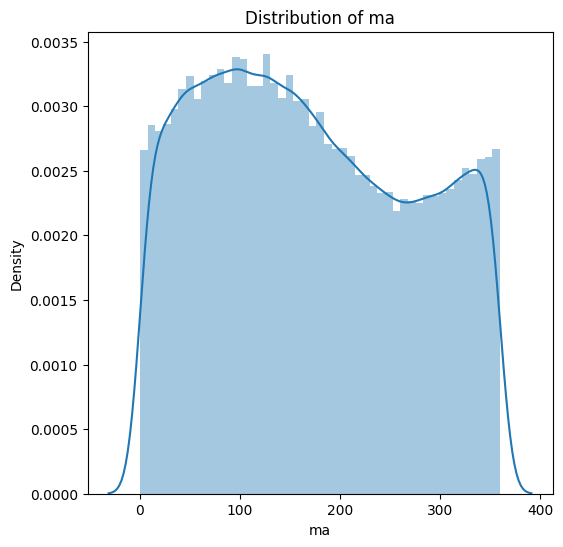

In [ ]:
plt.figure(figsize=(6,6))
sns.distplot(X_train,x=X_train['om'])
plt.xlabel("ma")
plt.title("Distribution of ma")
plt.show()

In [ ]:
print("minimum value of ma column is {}".format(min(X_train['ma'])))
print("50 percentile of ma column is {}".format(np.percentile(X_train['ma'], 50)))
print("95 percentile of ma column is {}".format(np.percentile(X_train['ma'], 90)))
print("99 percentile of ma column is {}".format(np.percentile(X_train['ma'], 99)))
print("maximum value of ma column is {}".format(max(X_train['ma'])))

minimum value of ma column is 0.00193035093993888
50 percentile of ma column is 186.8509386738742
95 percentile of ma column is 324.5293392127435
99 percentile of ma column is 356.3710684844592
maximum value of ma column is 359.9999791148726


In [ ]:
print("Number of missing value in training dataset of class column is {}".format(X_train['class'].isnull().sum()))
print("Number of missing values in testing dataset of class column is {}".format(X_test['class'].isnull().sum()))

Number of missing value in training dataset of class column is 0
Number of missing values in testing dataset of class column is 0


In [ ]:
X_train['class'].value_counts()

,count
class,
MBA,84613
OMB,5102
TJN,1279
IMB,372
APO,317
MCA,243
AMO,181
ATE,65
CEN,31


In [ ]:
temp=list(sorted(X_train.groupby('class').size(),reverse=True))
temp_df={'class':[],'count':[]}
for index,value in enumerate(temp) :
  temp_df['count'].append(value)
temp_df['class'].extend(['MBA','OMB','TJN','IMB','APO','MCA','AMO','ATE','CEN','TNO','AST'])
temp_df=pd.DataFrame(temp_df)
temp_df.columns=['class','count']

<Axes: xlabel='class', ylabel='count'>

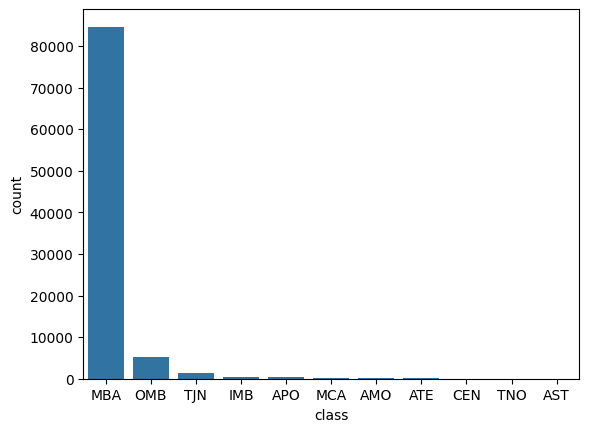

In [ ]:
sns.barplot(x="class", y="count", data=temp_df)

In [ ]:
print("Fraction of MBA class are {}".format((84613)/(X_train.shape[0])))

Fraction of MBA class are 0.9175522685867962


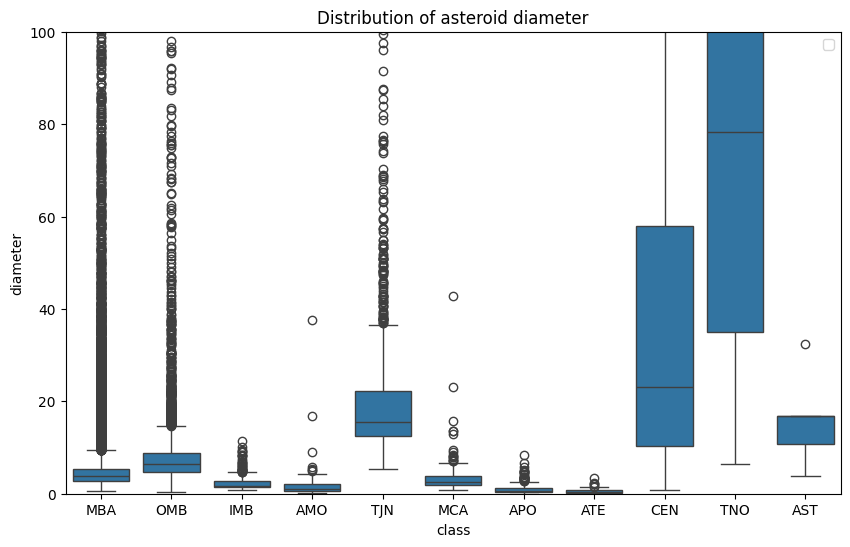

In [ ]:
plt.figure(figsize=(10,6))
sns.boxplot(data=temp_hist,x='class',y='diameter')
plt.title("Distribution of asteroid diameter")
plt.ylim((0,100))
plt.legend()
plt.show()

In [ ]:
#Function to estimate asteroid parameter
import math
def est_diameter(a,h) :
  r=(3.1236-(0.5*math.log10(a))-(0.2*h))
  d=math.pow(10,r)
  return d

In [ ]:
for index,value in X_train.iterrows() :
  a=value['albedo']
  h=value['H']
  X_train.at[index,'estimate_diameter']=est_diameter(a,h)

In [ ]:
for index,value in X_test.iterrows() :
  a=value['albedo']
  h=value['H']
  X_test.at[index,'estimate_diameter']=est_diameter(a,h)

In [ ]:
X_train.head(5)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma,estimate_diameter
54319,3.109871,0.192123,0.640855,152.162308,251.971646,2.512393,3.707348,5.484306,9330.0,0,885,14.5,N,N,0.039,1.52106,MBA,0.179718,2003.142718,350.610360,8.473595
155115,3.153208,0.234111,8.959962,342.058849,68.396293,2.415008,3.891407,5.599343,21411.0,0,314,15.6,N,N,0.034,1.44203,MBA,0.176025,2045.160166,139.043944,5.468403
79928,3.043164,0.164736,2.860792,126.445436,81.507194,2.541846,3.544482,5.308798,14445.0,0,506,14.9,N,N,0.070,1.53943,MBA,0.185659,1939.038567,254.520701,5.260790
282899,2.665060,0.122798,14.095948,221.504520,332.693249,2.337796,2.992324,4.350797,9016.0,0,267,15.7,N,N,0.090,1.34316,MBA,0.226539,1589.128442,287.809809,3.209806
410659,3.223407,0.420765,21.495786,306.500860,81.218790,1.867109,4.579705,5.787365,4907.0,0,104,16.3,N,N,0.043,1.00058,OMB,0.170307,2113.835232,291.154937,3.522620


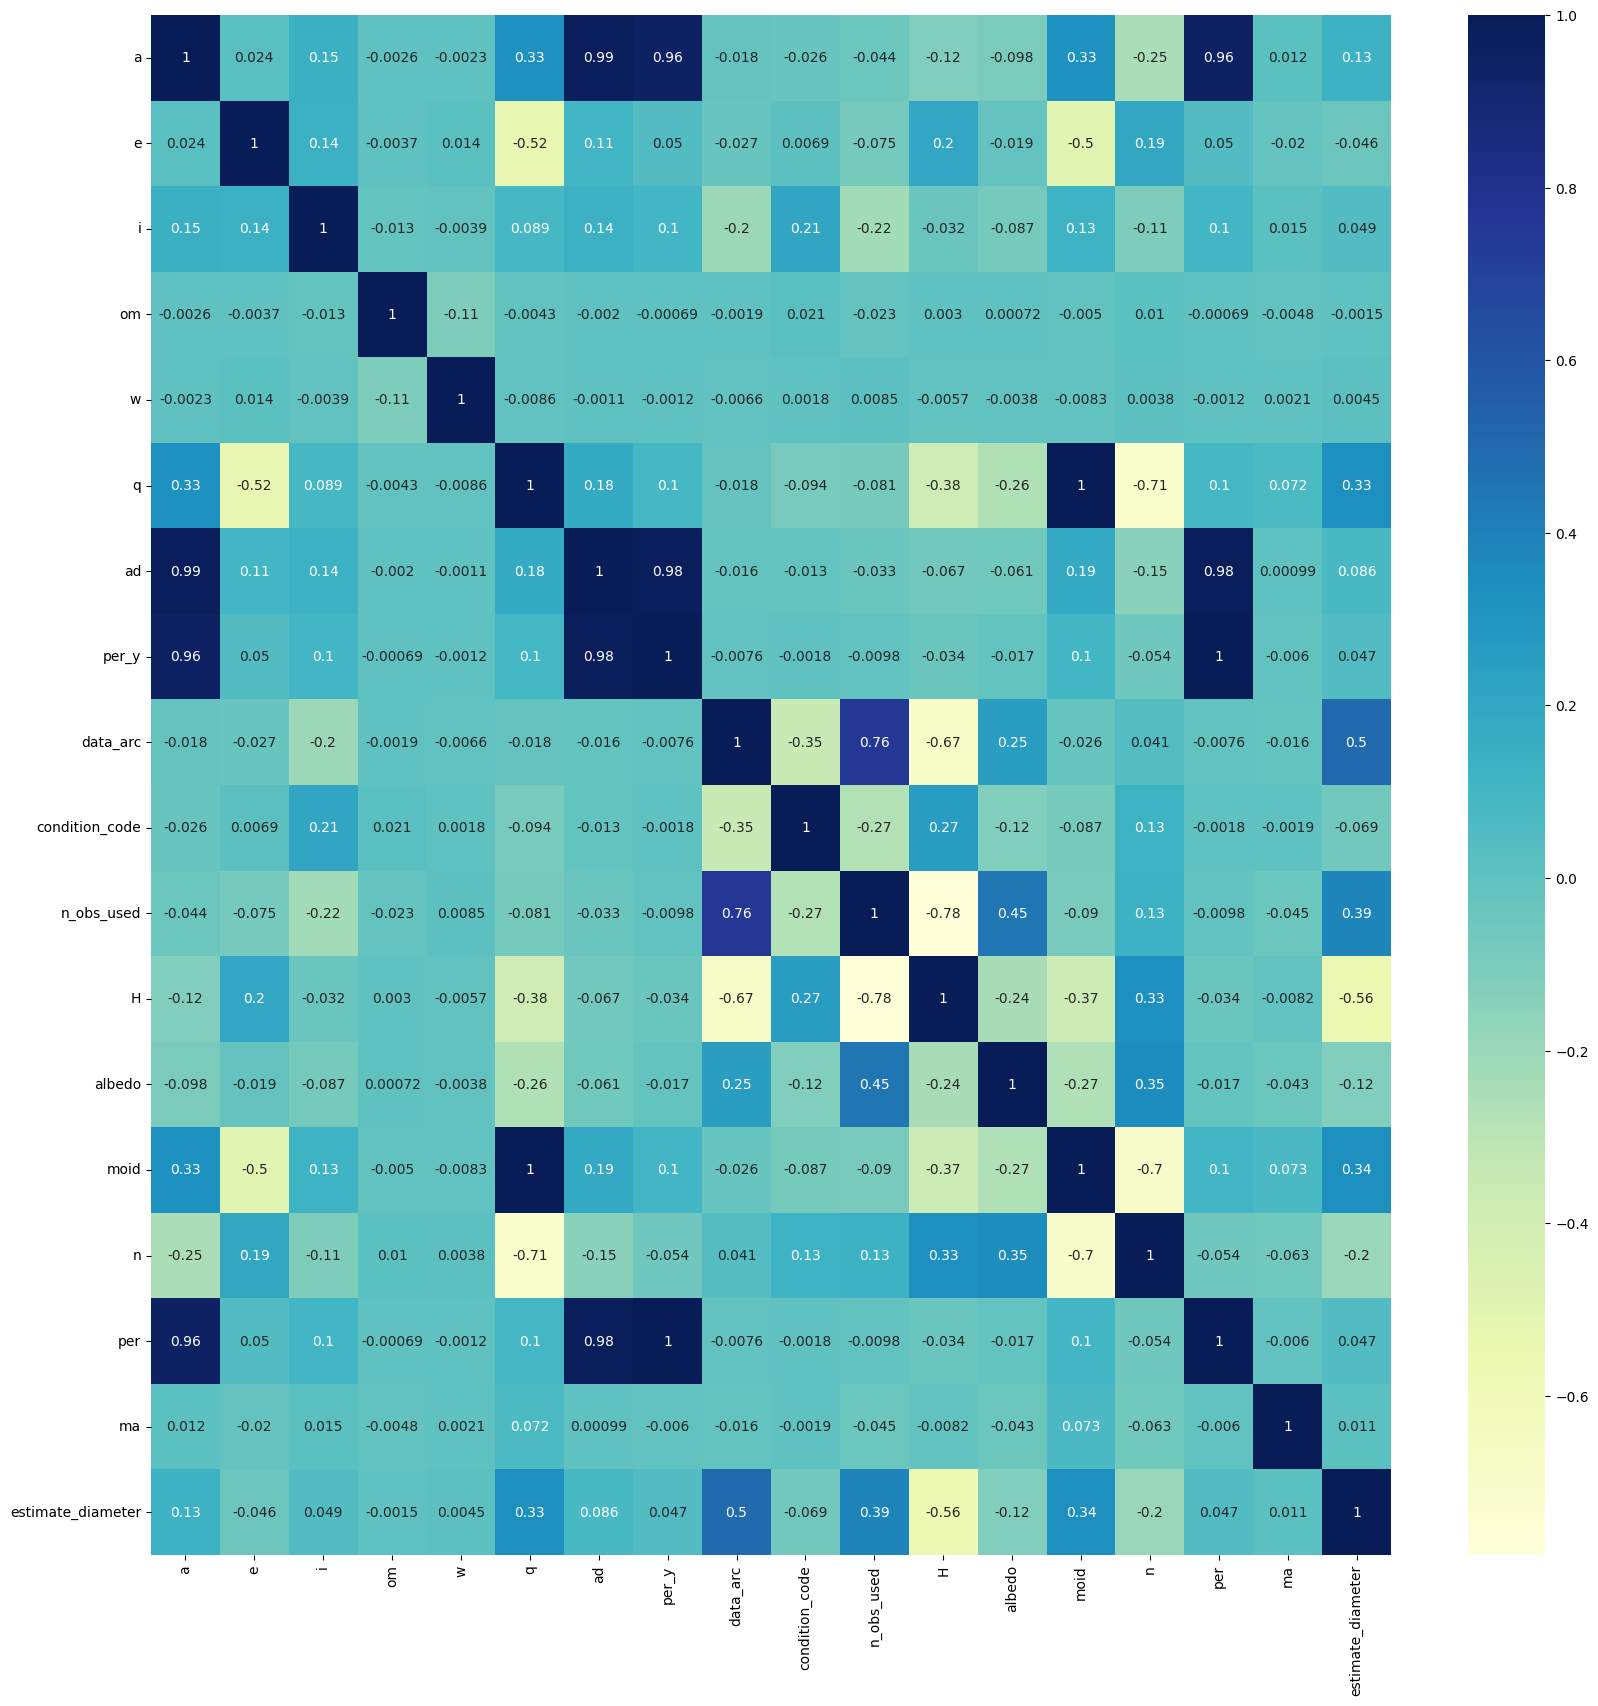

In [ ]:
numeric_X_train = X_train.select_dtypes(include=[np.number])  # Keep only numeric columns
plt.figure(figsize=(20, 20))  # Adjust figure size if needed
sns.heatmap(numeric_X_train.corr(), cmap="YlGnBu", annot=True)
plt.show()

In [ ]:
X_train.head(5)

,a,e,i,om,w,q,ad,per_y,data_arc,condition_code,n_obs_used,H,neo,pha,albedo,moid,class,n,per,ma,estimate_diameter
54319,3.109871,0.192123,0.640855,152.162308,251.971646,2.512393,3.707348,5.484306,9330.0,0,885,14.5,N,N,0.039,1.52106,MBA,0.179718,2003.142718,350.610360,8.473595
155115,3.153208,0.234111,8.959962,342.058849,68.396293,2.415008,3.891407,5.599343,21411.0,0,314,15.6,N,N,0.034,1.44203,MBA,0.176025,2045.160166,139.043944,5.468403
79928,3.043164,0.164736,2.860792,126.445436,81.507194,2.541846,3.544482,5.308798,14445.0,0,506,14.9,N,N,0.070,1.53943,MBA,0.185659,1939.038567,254.520701,5.260790
282899,2.665060,0.122798,14.095948,221.504520,332.693249,2.337796,2.992324,4.350797,9016.0,0,267,15.7,N,N,0.090,1.34316,MBA,0.226539,1589.128442,287.809809,3.209806
410659,3.223407,0.420765,21.495786,306.500860,81.218790,1.867109,4.579705,5.787365,4907.0,0,104,16.3,N,N,0.043,1.00058,OMB,0.170307,2113.835232,291.154937,3.522620


In [ ]:
X_train.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'albedo', 'moid',
       'class', 'n', 'per', 'ma', 'estimate_diameter'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#Separating categorical data
X_train_temp=X_train.loc[:,['condition_code','neo','pha','class']]
X_train_numerical=X_train.drop(['condition_code','neo','pha','class'],axis=1)

In [ ]:
X_train_numerical.head(1)

,a,e,i,om,w,q,ad,per_y,data_arc,n_obs_used,H,albedo,moid,n,per,ma,estimate_diameter
54319,3.109871,0.192123,0.640855,152.162308,251.971646,2.512393,3.707348,5.484306,9330.0,885,14.5,0.039,1.52106,0.179718,2003.142718,350.61036,8.473595


In [ ]:
X_test_temp=X_test.loc[:,['condition_code','neo','pha','class']]
X_test_numerical=X_test.drop(['condition_code','neo','pha','class'],axis=1)

In [ ]:
train_column=list(X_train_numerical.columns)
test_column=list(X_test_numerical.columns)

In [ ]:
print(train_column)

['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'estimate_diameter']


In [ ]:
scaler = StandardScaler()
X_train_numerical=scaler.fit_transform(X_train_numerical)
X_test_numerical=scaler.transform(X_test_numerical)

In [ ]:
#Saving standard scaler for our query point
from joblib import dump
dump(scaler, 'final_standardscaler.joblib')

['final_standardscaler.joblib']

In [ ]:
X_train_temp.head(1)

,condition_code,neo,pha,class
54319,0,N,N,MBA


In [ ]:
#Excluding condition code as it has been alraedy in numerical form
X_train_temp = pd.get_dummies(X_train_temp, columns = ['neo', 'pha','class'])
X_test_temp = pd.get_dummies(X_test_temp, columns = ['neo', 'pha','class'])

In [ ]:
train_column=list(train_column)+list(X_train_temp.columns)
test_column=list(test_column)+list(X_test_temp.columns)

In [ ]:
X_train_temp=np.array(X_train_temp)
X_test_temp=np.array(X_test_temp)

In [ ]:
#Combining both numerical and categorical transformation
X_train=pd.DataFrame(np.concatenate([X_train_numerical,X_train_temp],axis=1))
X_test=pd.DataFrame(np.concatenate([X_test_numerical,X_test_temp],axis=1))

In [ ]:
X_train.columns=train_column
X_test.columns=test_column

In [ ]:
print(train_column)

['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used', 'H', 'albedo', 'moid', 'n', 'per', 'ma', 'estimate_diameter', 'condition_code', 'neo_N', 'neo_Y', 'pha_N', 'pha_Y', 'class_AMO', 'class_APO', 'class_AST', 'class_ATE', 'class_CEN', 'class_IMB', 'class_MBA', 'class_MCA', 'class_OMB', 'class_TJN', 'class_TNO']


In [ ]:
#Weights of Ridge regression
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'alpha': 100}


In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)

Ridge(alpha=100)

In [ ]:
#Weights without any addition of noise
W=rid.coef_

In [ ]:
#Let's add little noise to the data
X_noise=X_train.values + 0.00005

In [ ]:
#Now let's fit a model with noise addition data
rid_noise=Ridge(alpha=100)
rid_noise.fit(X_noise,Y_train.values)

Ridge(alpha=100)

In [ ]:
W_noise=rid_noise.coef_

In [ ]:
#Change in weights
change = abs((W[0] - W_noise[0])/(W[0]))
percentage_change=change*100

In [ ]:
print(percentage_change)

8.84449571126134e-12


In [ ]:
#I will build a random model which i treat as a baseline model every other sophisticated model should perform better than this random model
#I will build random model where y_pred will be mean of y_actual only
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
mean_y_train=np.mean(Y_train['diameter'])
y_train_pred=np.full((1,X_train.shape[0]),mean_y_train)[0]
y_train=Y_train['diameter'].values
print("Mean squared error for training dataset for random model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for random model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for random model is 82.181428169367
R2 score for training dataset for random model is 0.0


In [ ]:
y_test_pred=np.full((1,X_test.shape[0]),mean_y_train)[0]
y_test=Y_test['diameter'].values
print("Mean squared error for testing dataset for random model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for random model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for random model is 100.09054668886617
R2 score for testing dataset for random model is -7.405887870293171e-06


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'alpha': 100}


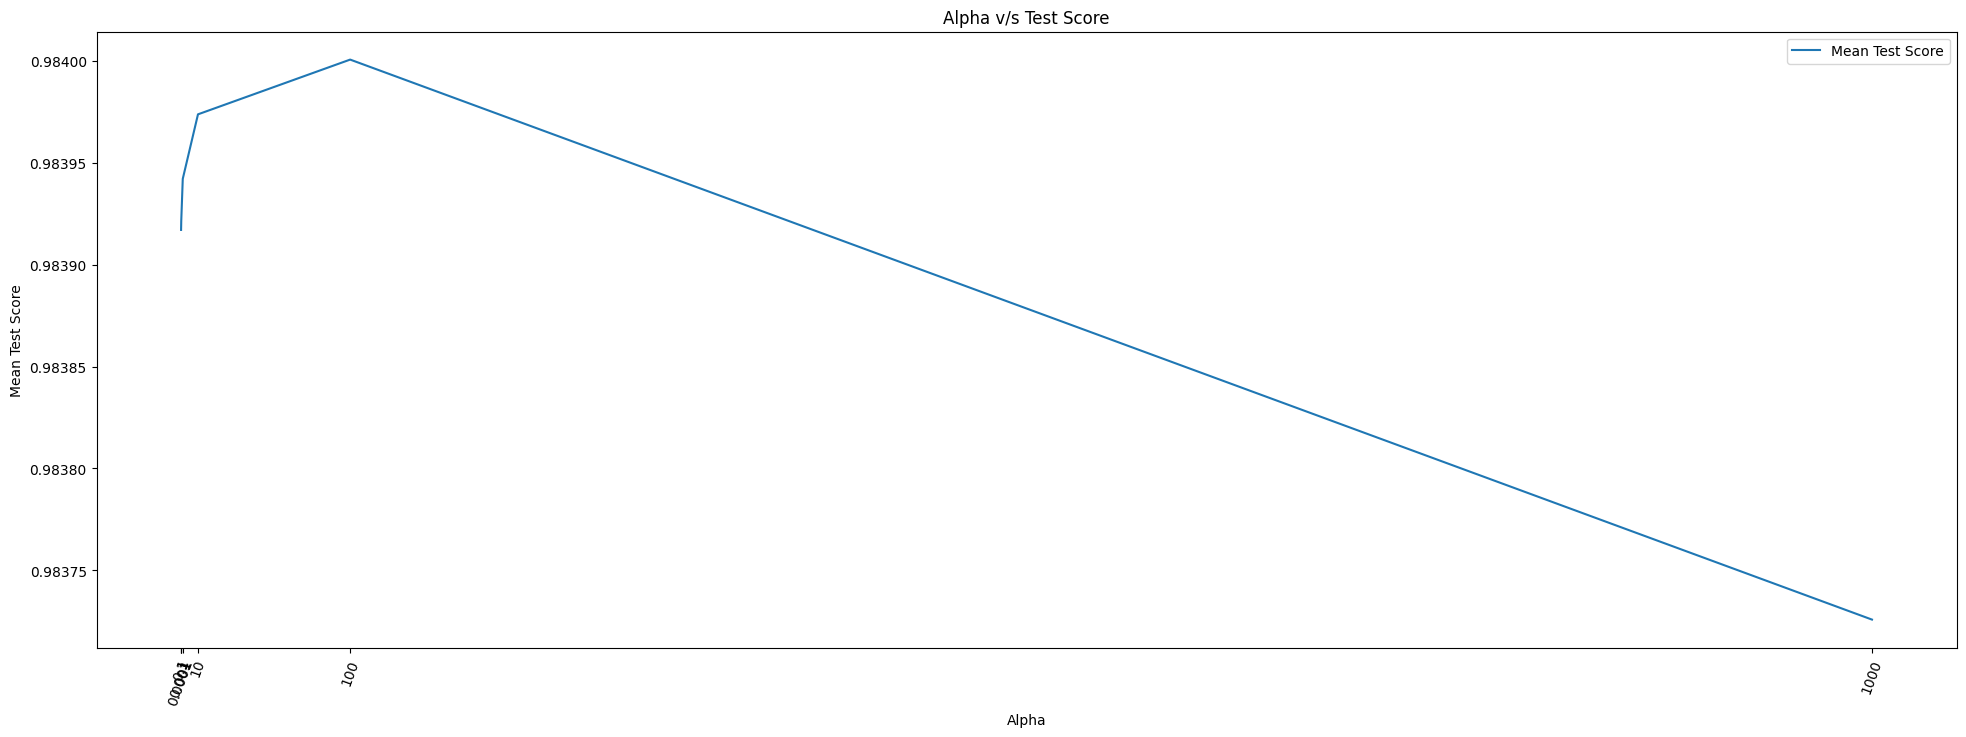

In [ ]:
#Alpha vs test score
test_score=[]
plt.figure(figsize=(24,8))
test_score.extend(list(clf.cv_results_['mean_test_score']))
alpha=[0.0001,0.001,0.1,1,10,100,1000]
plt.plot(alpha,test_score,label='Mean Test Score')
labels=['0.0001','0.001','0.1','1','10','100','1000']
plt.xticks(alpha, labels, rotation =70)
plt.legend()
plt.xlabel("Alpha")
plt.ylabel("Mean Test Score")
plt.title("Alpha v/s Test Score")
plt.show()


In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for linear regression model is 1.2759073138760955
R2 score for training dataset for linear regression model is 0.9844745054655586


In [ ]:
print(X_test.isnull().sum())  # Shows the number of NaNs in each column


a                    0
e                    0
i                    0
om                   0
w                    0
q                    0
ad                   0
per_y                0
data_arc             0
n_obs_used           0
H                    0
albedo               0
moid                 0
n                    0
per                  0
ma                   0
estimate_diameter    0
condition_code       0
neo_N                0
neo_Y                0
pha_N                0
pha_Y                0
class_AMO            0
class_APO            0
class_AST            0
class_ATE            0
class_CEN            0
class_IMB            0
class_MBA            0
class_MCA            0
class_OMB            0
class_TJN            0
class_TNO            0
dtype: int64


In [ ]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for linear regression model is 1.631872885050184
R2 score for testing dataset for linear regression model is 0.9836959131056549


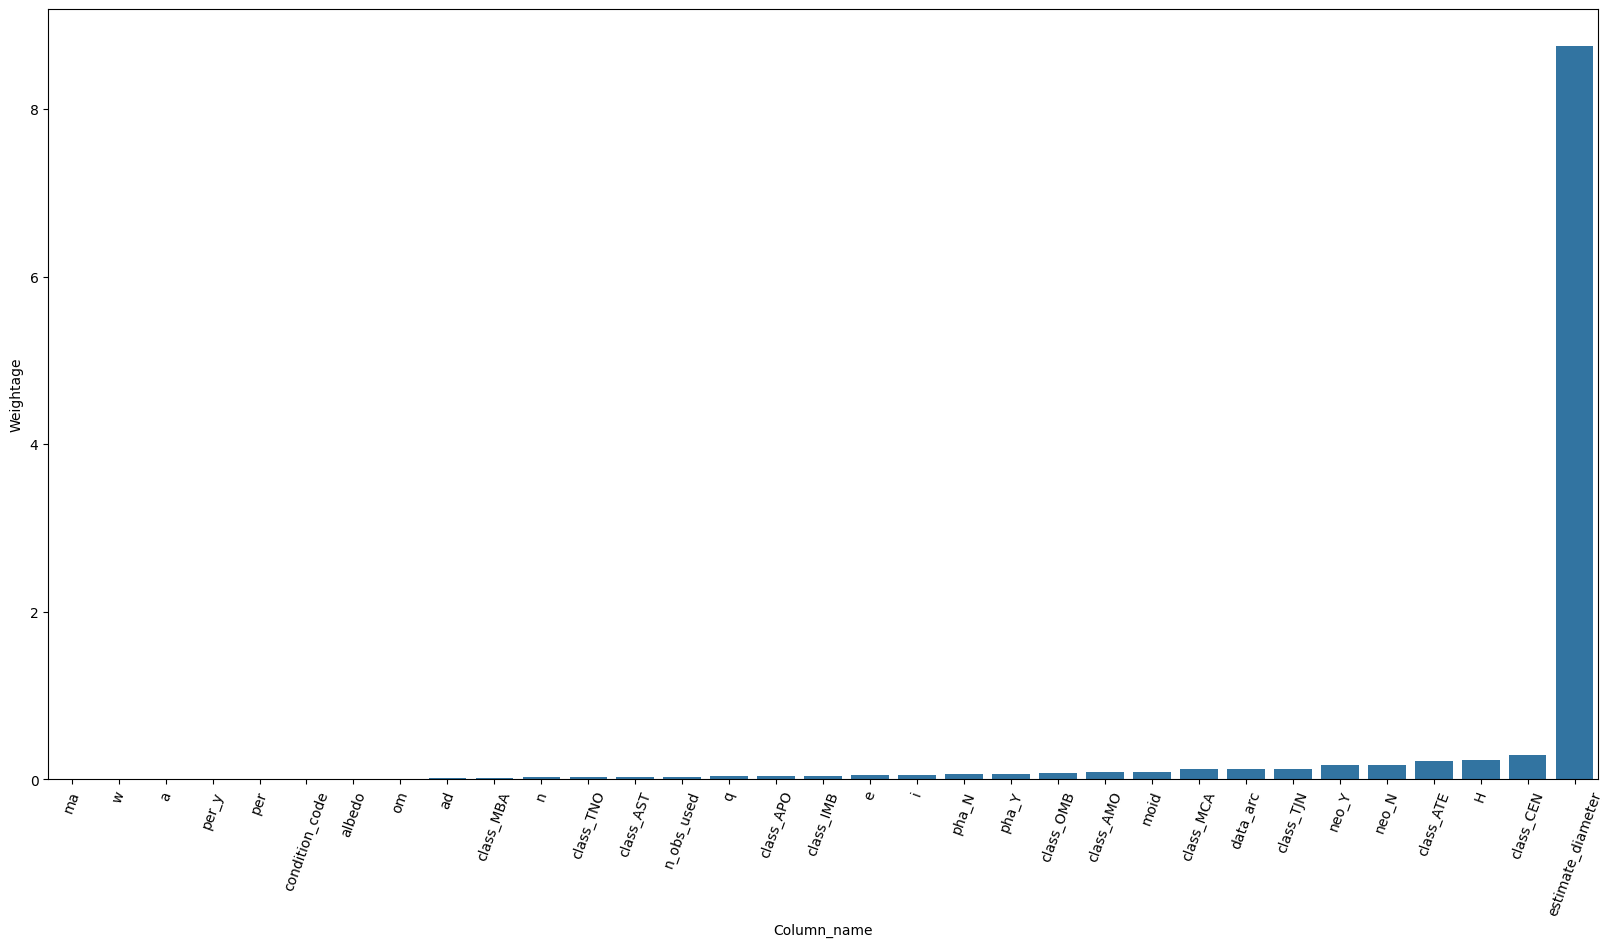

In [ ]:
column_name = X_train.columns
coef = abs(rid.coef_)  # Remove indexing issue

plt.figure(figsize=(20,10))

# Creating dictionary for plotting
temp_dict = {'Column_name': column_name, 'Weightage': coef}

# Converting to DataFrame
temp_df = pd.DataFrame(temp_dict)

# Sorting by weightage
temp_df = temp_df.sort_values(by='Weightage')

# Plotting feature importance
sns.barplot(data=temp_df, x='Column_name', y='Weightage')
plt.xticks(rotation=70)
plt.show()


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
#Grid search for finding best value of number of nearest neighbors
parameters={'n_neighbors':[5,10,20,30,50,100]}
knn=KNeighborsRegressor()
clf=GridSearchCV(knn,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'n_neighbors': 5}


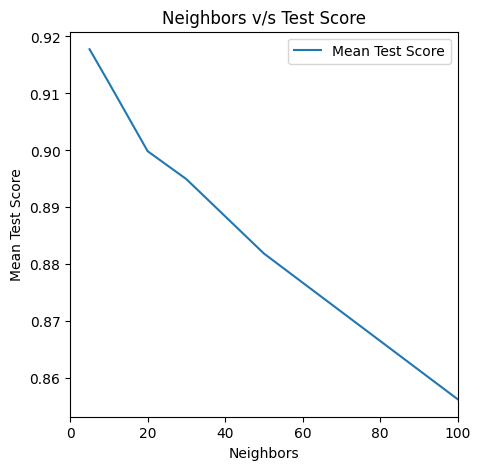

In [ ]:
#Neighbors vs test score
test_score=[]
plt.figure(figsize=(5,5))
test_score.extend(list(clf.cv_results_['mean_test_score']))
neighbors=[5,10,20,30,50,100]
plt.plot(neighbors,test_score,label='Mean Test Score')
labels=['5','10','20','30','50','100']
plt.legend()
plt.xlabel("Neighbors")
plt.ylabel("Mean Test Score")
plt.xlim([0,100])
plt.title("Neighbors v/s Test Score")
plt.show()

In [ ]:
#Now let's fit a model with best parameters
knn=KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train.values,Y_train.values)
y_train_pred=knn.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for knn model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for knn model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for knn model is 5.726171046772903
R2 score for training dataset for knn model is 0.9303228092486798


In [ ]:
y_test_pred=knn.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for knn model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for knn model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for knn model is 11.400172763926905
R2 score for testing dataset for knn model is 0.8861005602480515


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
#Grid search for finding best value of number of tree ,  min_split and min_samples_leaf
parameters={'n_estimators':[10,20,20,40,50], 'min_samples_split':[2,5,10,15,20] , 'min_samples_leaf' :[1,5,10,15,20]}
rff=RandomForestRegressor()
clf=RandomizedSearchCV(rff,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

Best paramater values are {'n_estimators': 50, 'min_samples_split': 5, 'min_samples_leaf': 1}


In [ ]:
#Now let's fit a model with best parameters
from sklearn.ensemble import RandomForestRegressor
rff=RandomForestRegressor(n_estimators=10,min_samples_split=2,min_samples_leaf=1)
rff.fit(X_train.values,Y_train.values)
y_train_pred=rff.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for Random Forest model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for Random Forest model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for Random Forest model is 1.3795322997187855
R2 score for training dataset for Random Forest model is 0.9832135759812336


In [ ]:
y_test_pred=rff.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for Random Forest model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for Random Forest model is {}".format(r2_score(y_test,y_test_pred)))

Mean squared error for testing dataset for Random Forest model is 7.653737105645802
R2 score for testing dataset for Random Forest model is 0.9235313019904208


In [ ]:
#Removing five least import features
import_feat=temp_df['Column_name'][5:]
X_train=X_train[import_feat]

In [ ]:
X_train.head()

,condition_code,albedo,om,ad,class_MBA,n,class_TNO,class_AST,n_obs_used,q,class_APO,class_IMB,e,i,pha_N,pha_Y,class_OMB,class_AMO,moid,class_MCA,data_arc,class_TJN,neo_Y,neo_N,class_ATE,H,class_CEN,estimate_diameter
0,0,-0.832743,-0.172264,0.145296,True,-0.702281,False,False,0.354481,0.211963,False,False,0.600782,-1.425502,True,False,False,False,0.196105,False,0.060454,False,False,True,False,-0.485323,False,0.343177
1,0,-0.878499,1.678685,0.20123,True,-0.767509,False,False,-0.604254,0.022231,False,False,1.141182,-0.205842,True,False,False,False,0.040912,False,2.025087,False,False,True,False,0.297865,False,0.02048
2,0,-0.549055,-0.42293,0.095803,True,-0.597318,False,False,-0.281877,0.269345,False,False,0.248298,-1.100038,True,False,False,False,0.232179,False,0.892264,False,False,True,False,-0.200528,False,-0.001814
3,0,-0.366031,0.503624,-0.071993,True,0.124879,False,False,-0.683169,-0.128199,False,False,-0.291457,0.547142,True,False,False,False,-0.153242,False,0.009391,False,False,True,False,0.369063,False,-0.222048
4,0,-0.796138,1.332096,0.410398,False,-0.868538,False,False,-0.956853,-1.045227,False,False,3.543503,1.632028,True,False,True,False,-0.825976,False,-0.658821,False,False,True,False,0.796257,False,-0.188458


In [ ]:
print(X_train.columns)

Index(['condition_code', 'albedo', 'om', 'ad', 'class_MBA', 'n', 'class_TNO',
       'class_AST', 'n_obs_used', 'q', 'class_APO', 'class_IMB', 'e', 'i',
       'pha_N', 'pha_Y', 'class_OMB', 'class_AMO', 'moid', 'class_MCA',
       'data_arc', 'class_TJN', 'neo_Y', 'neo_N', 'class_ATE', 'H',
       'class_CEN', 'estimate_diameter'],
      dtype='object')


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

In [ ]:
X_test=X_test[import_feat]

In [ ]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

In [ ]:
print("Column in traning dataset are {}".format(list(X_train.columns)))

In [ ]:
X_train=X_train.drop(['n','n_obs_used'],axis=1)

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
#Grid search for finding best coefficient for regualrization
parameters={'alpha':[0.0001,0.001,0.1,1,10,100,1000]}
rid=Ridge()
clf=GridSearchCV(rid,parameters)
clf.fit(X_train.values,Y_train.values)
print("Best paramater values are {}".format(clf.best_params_))

In [ ]:
#Now let's fit a model with best parameters
rid=Ridge(alpha=100)
rid.fit(X_train.values,Y_train.values)
y_train_pred=rid.predict(X_train.values)
y_train_pred=y_train_pred.ravel()
y_train=Y_train.values.ravel()
print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

Mean squared error for training dataset for linear regression model is 1.2763689675835068
R2 score for training dataset for linear regression model is 0.9844688879712208


In [ ]:
X_test=X_test.drop(['n','n_obs_used'],axis=1)

In [ ]:
y_test_pred=rid.predict(X_test.values)
y_test_pred=y_test_pred.ravel()
y_test=Y_test.values.ravel()
print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

In [ ]:
#saving our final model
import pickle
pickle.dump(rid, open('final_model.pkl', 'wb'))

In [ ]:
X_train.head()

In [ ]:
# X_train_temp=X_train.drop(['estimate_diameter'],axis=1)

In [ ]:
# #Now let's fit our final model with best parameter and without estimate diameter
# rid=Ridge(alpha=100)
# rid.fit(X_train_temp.values,Y_train.values)
# y_train_pred=rid.predict(X_train_temp.values)
# y_train_pred=y_train_pred.ravel()
# y_train=Y_train.values.ravel()
# print("Mean squared error for training dataset for linear regression model is {}".format(mean_squared_error(y_train,y_train_pred)))
# print("R2 score for training dataset for linear regression model is {}".format(r2_score(y_train,y_train_pred)))

In [ ]:
# X_test_temp=X_test.drop(['estimate_diameter'],axis=1)

In [ ]:
# y_test_pred=rid.predict(X_test_temp.values)
# y_test_pred=y_test_pred.ravel()
# y_test=Y_test.values.ravel()
# print("Mean squared error for testing dataset for linear regression model is {}".format(mean_squared_error(y_test,y_test_pred)))
# print("R2 score for testing dataset for linear regression model is {}".format(r2_score(y_test,y_test_pred)))

In [ ]:
import numpy as np

# Sigmoid function for manual prediction
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Function to classify damage level based on model outputs
def classify_damage(is_hazardous, diameter):
    if is_hazardous == 0 and diameter < 50:
        return "Low"
    elif is_hazardous == 0 and diameter >= 50:
        return "Medium"
    elif is_hazardous == 1 and diameter < 300:
        return "High"
    else:
        return "Extreme"
random_index_diameter = np.random.randint(0, X_test_temp.shape[0])  # Select random test input
random_example_diameter = X_test_temp[random_index_diameter]

# Predict diameter using sklearn model
predicted_diameter = rid.predict([random_example_diameter])[0]  # Diameter value
